## Conditional Probability

You are working on a research project involving a clinical trial for a new drug. The trial involves two groups of patients: Group A (who receive the drug) and Group B (who receive a placebo). The probability that a patient in Group A recovers is 70%, while the probability that a patient in Group B recovers is 30%. Additionally, there is a 10% probability that a patient in either group will experience a side effect. However, the probability of experiencing a side effect is higher (20%) for patients who do not recover, regardless of the group they belong to.

Problem:

**Part 1:** Write a Python program to simulate this clinical trial with 10,000 patients, where half of the patients are in Group A and the other half are in Group B. For each patient, record whether they recover, whether they experience a side effect, and which group they belong to.

**Part 2:** Based on your simulation results, answer the following:

What is the conditional probability that a patient recovers given that they experienced a side effect?

What is the conditional probability that a patient experiences a side effect given that they did not recover?

How does the probability of recovery differ between Group A and Group B?







In [ ]:
import numpy as np

total_participants = 10000
participants_in_group_a = total_participants // 2
participants_in_group_b = total_participants // 2

# Probabilities for recovery and side effects
recovery_probability_a = 0.7
recovery_probability_b = 0.3
general_side_effect_probability = 0.1
side_effect_without_recovery_probability = 0.2

# Initialize arrays
recovery_status = np.zeros(total_participants, dtype=bool)
side_effect_status = np.zeros(total_participants, dtype=bool)
group_assignment = np.zeros(total_participants, dtype=bool)  # True for Group A, False for Group B

# Function to simulate a patient's response
def simulate_patient_response(index, group, recovery_prob):
    group_assignment[index] = group
    has_recovered = np.random.rand() < recovery_prob
    recovery_status[index] = has_recovered
    if has_recovered:
        side_effect_status[index] = np.random.rand() < general_side_effect_probability
    else:
        side_effect_status[index] = np.random.rand() < side_effect_without_recovery_probability

# Simulate Group A
for i in range(participants_in_group_a):
    simulate_patient_response(i, True, recovery_probability_a)

# Simulate Group B
for i in range(participants_in_group_a, total_participants):
    simulate_patient_response(i, False, recovery_probability_b)

# Calculation of probabilities

# 1. P(Recovery | Side Effect)
total_with_side_effects = np.sum(side_effect_status)
recovered_with_side_effects = np.sum(recovery_status & side_effect_status)
probability_recovery_given_side_effect = recovered_with_side_effects / total_with_side_effects if total_with_side_effects > 0 else 0

# 2. P(Side Effect | No Recovery)
total_no_recovery = np.sum(~recovery_status)
side_effects_without_recovery = np.sum(side_effect_status & ~recovery_status)
probability_side_effect_given_no_recovery = side_effects_without_recovery / total_no_recovery if total_no_recovery > 0 else 0

# 3. Recovery probabilities for Group A and Group B
probability_recovery_group_a = np.sum(recovery_status[group_assignment]) / participants_in_group_a
probability_recovery_group_b = np.sum(recovery_status[~group_assignment]) / participants_in_group_b

print(f"Conditional Probability of Recovery Given Side Effect: {probability_recovery_given_side_effect:.4f}")
print(f"Conditional Probability of Side Effect Given No Recovery: {probability_side_effect_given_no_recovery:.4f}")
print(f"Recovery Probability in Group A: {probability_recovery_group_a:.4f}")
print(f"Recovery Probability in Group B: {probability_recovery_group_b:.4f}")


Conditional Probability of Recovery Given Side Effect: 0.3131
Conditional Probability of Side Effect Given No Recovery: 0.2085
Recovery Probability in Group A: 0.6898
Recovery Probability in Group B: 0.3002


## Handling Missing Data:

**Mean Imputation:** Replace missing values in numerical columns with the mean of the respective column.

**Median Imputation:** Replace missing values in numerical columns with the median of the respective column.

**Mode Imputation:** Replace missing values in categorical columns with the mode (most frequent value) of the respective column.

**k-Nearest Neighbors (kNN) Imputation:** Use kNN to impute missing values based on the k nearest data points.

### Tasks:

Implement each of the above imputation methods and apply them to the given dataset.

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/missing_data.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Original DataFrame Description:
       num_feature_1  num_feature_2  num_feature_3  num_feature_4
count     900.000000     950.000000    1000.000000    1000.000000
mean       50.302932      30.363588      73.452402      23.850258
std         9.748132       4.994223     123.079278      28.529768
min        17.587327      15.298057       0.001163       0.000614
25%        43.524097      26.951424      25.322967       5.833381
50%        50.292505      30.337116      51.969723      14.313764
75%        56.640161      33.681762      78.144736      29.019209
max        80.788808      45.965538     966.047505     167.221882

DataFrame Descriptions After Imputation:
Mode Imputation:
       num_feature_1  num_feature_2  num_feature_3  num_feature_4
count     900.000000     950.000000    1000.000000    1000.000000
mean       50.302932      30.363588      73.452402      23.850258
std         9.748132       4.994223     123.079278      28.529768
min        17.587327      15.298057       0.001163 

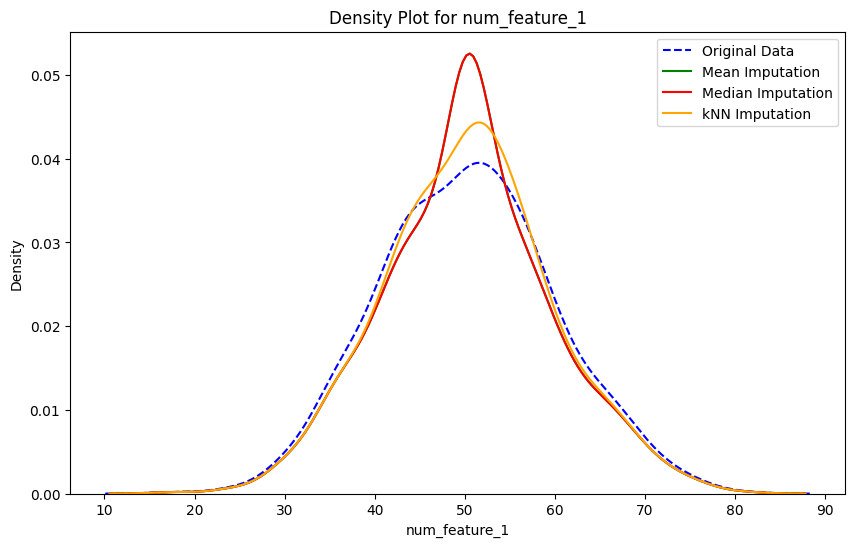

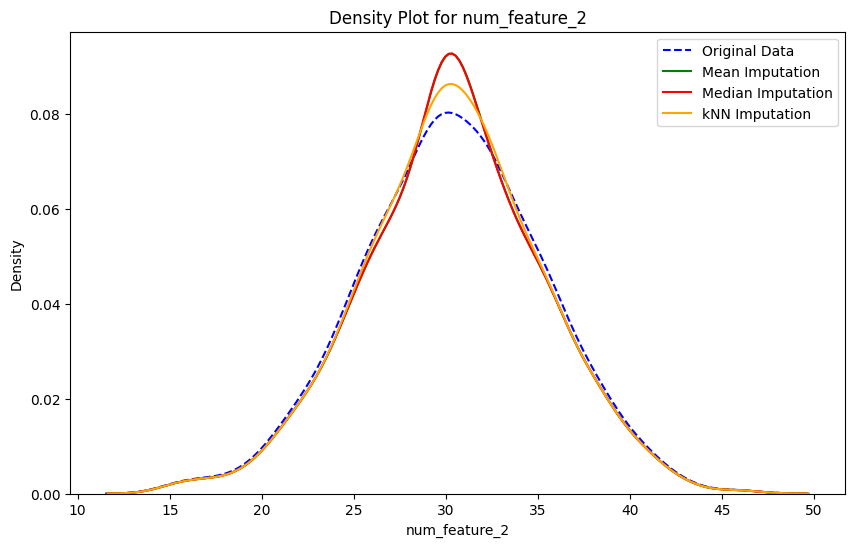

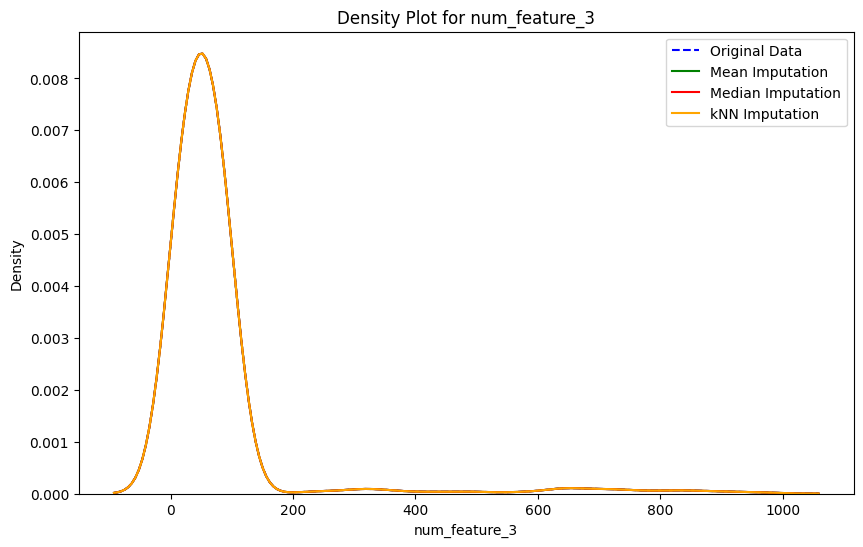

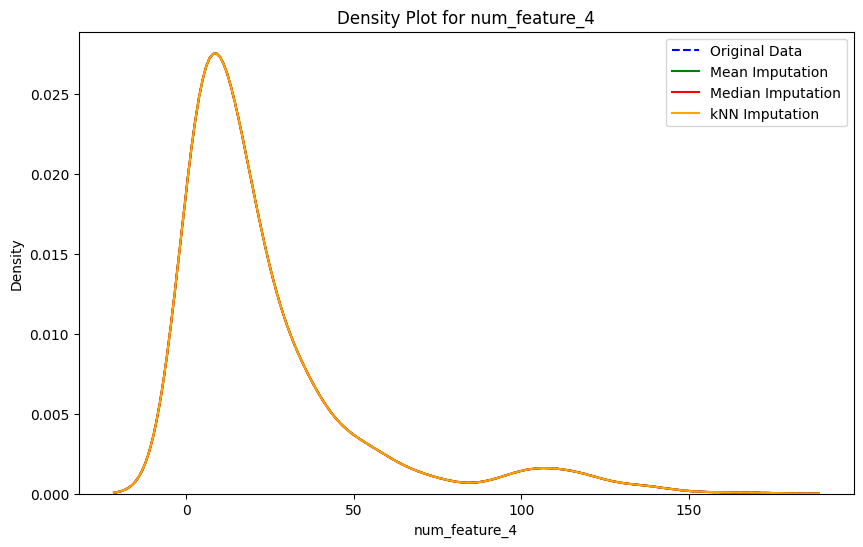


Comparing Count Plots - Mode Imputation


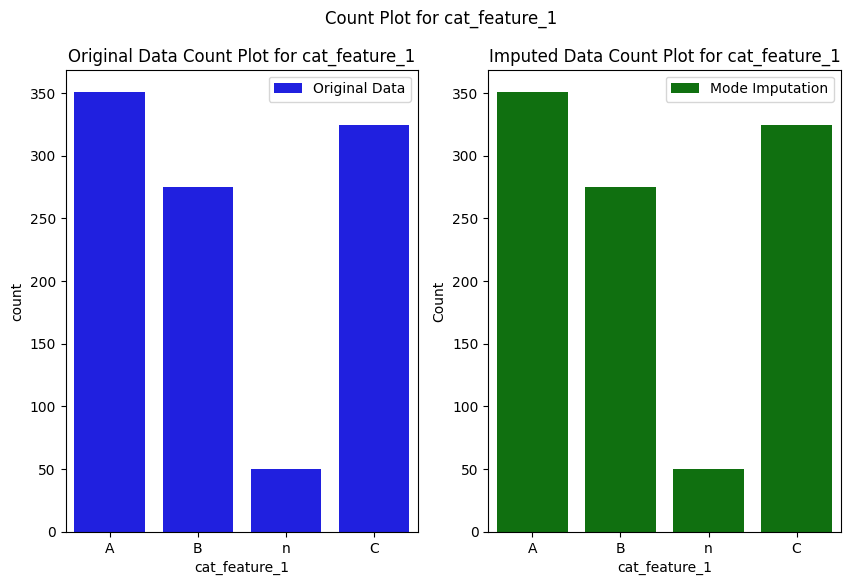

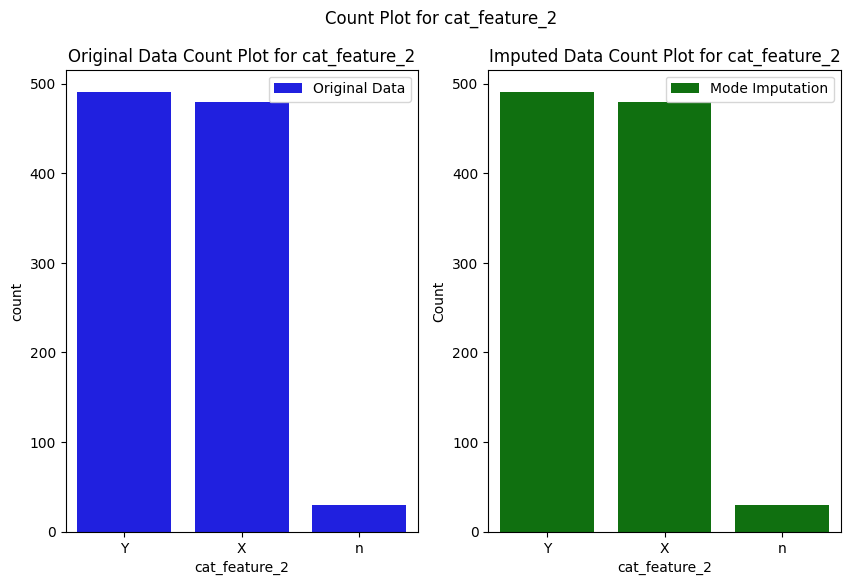

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer

# Load dataset
#df = pd.read_csv('missing_data.csv')
print("Original DataFrame Description:")
print(df.describe())

# Define features
num_features = ['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4']
cat_features = ['cat_feature_1', 'cat_feature_2']

# 1. Imputation Methods

# Mean Imputation for Numerical Features
def impute_mean(df):
    imputer = SimpleImputer(strategy='mean')
    df_imputed = df.copy()
    df_imputed[num_features] = imputer.fit_transform(df[num_features])
    return df_imputed

# Median Imputation for Numerical Features
def impute_median(df):
    imputer = SimpleImputer(strategy='median')
    df_imputed = df.copy()
    df_imputed[num_features] = imputer.fit_transform(df[num_features])
    return df_imputed

# Mode Imputation for Categorical Features
def impute_mode(df):
    imputer = SimpleImputer(strategy='most_frequent')
    df_imputed = df.copy()
    df_imputed[cat_features] = imputer.fit_transform(df[cat_features])
    return df_imputed

# kNN Imputation for Numerical Features
def impute_knn(df):
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = df.copy()
    df_imputed[num_features] = imputer.fit_transform(df[num_features])
    return df_imputed

# Apply Imputation Methods
df_mode = impute_mode(df)  # Apply mode imputation to categorical features first
df_mean = impute_mean(df_mode)  # Apply mean imputation to numerical features
df_median = impute_median(df_mode)  # Apply median imputation to numerical features
df_knn = impute_knn(df_mode)  # Apply kNN imputation to numerical features

# Print descriptions after imputation
print("\nDataFrame Descriptions After Imputation:")
print("Mode Imputation:")
print(df_mode.describe())
print("Mean Imputation:")
print(df_mean.describe())
print("Median Imputation:")
print(df_median.describe())
print("kNN Imputation:")
print(df_knn.describe())

# 2. Analyze Imputation Performance with Density and Count Plots

def plot_comparisons(original_df, imputed_dfs, features, plot_type='density'):
    colors = ['blue', 'green', 'red', 'orange']
    labels = ['Original Data', 'Mean Imputation', 'Median Imputation', 'kNN Imputation']

    for feature in features:
        plt.figure(figsize=(10, 6))
        if plot_type == 'density':
            sns.kdeplot(original_df[feature].dropna(), label=labels[0], color=colors[0], linestyle='--')
            for imputed_df, color, label in zip(imputed_dfs, colors[1:], labels[1:]):
                sns.kdeplot(imputed_df[feature], label=label, color=color)
            plt.title(f'Density Plot for {feature}')
        elif plot_type == 'count':
            plt.subplot(1, 2, 1)
            sns.countplot(x=original_df[feature], label='Original Data', color=colors[0])
            plt.title(f'Original Data Count Plot for {feature}')

            plt.subplot(1, 2, 2)
            sns.countplot(x=imputed_dfs[0][feature], label='Mode Imputation', color=colors[1])
            plt.title(f'Imputed Data Count Plot for {feature}')

            plt.suptitle(f'Count Plot for {feature}')

        plt.xlabel(feature)
        plt.ylabel('Density' if plot_type == 'density' else 'Count')
        plt.legend()
        plt.show()

# Plot density for numerical features
print("\nComparing Density Plots")
plot_comparisons(df, [df_mean, df_median, df_knn], num_features, plot_type='density')

# Plot count for categorical features using Mode Imputation
print("\nComparing Count Plots - Mode Imputation")
plot_comparisons(df, [df_mode], cat_features, plot_type='count')



Comparing Density Plots with Combined Imputation


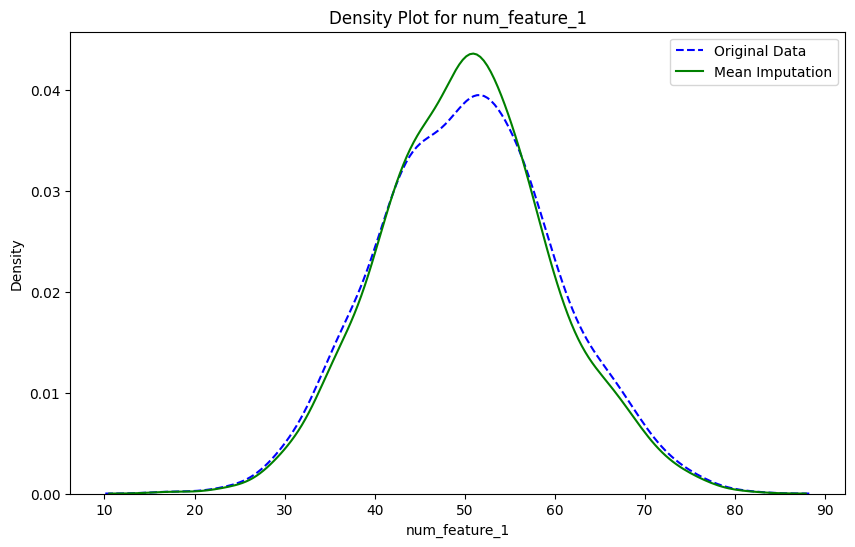

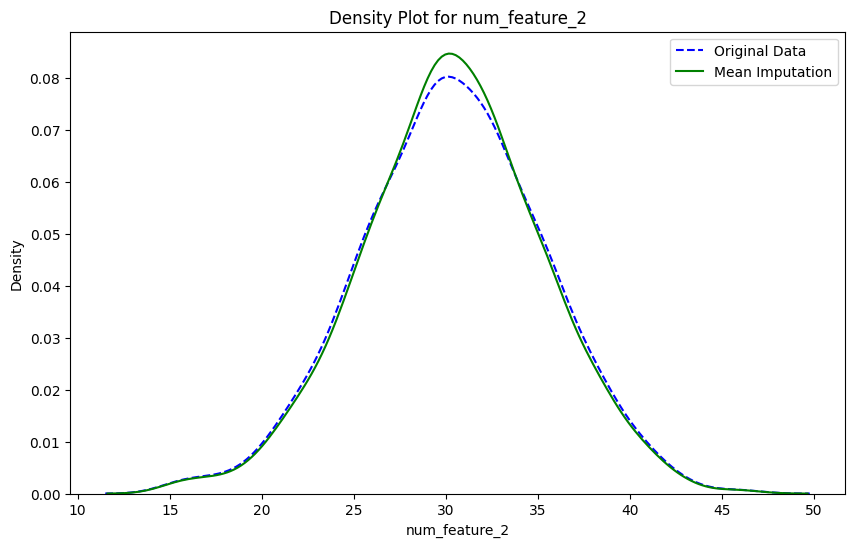

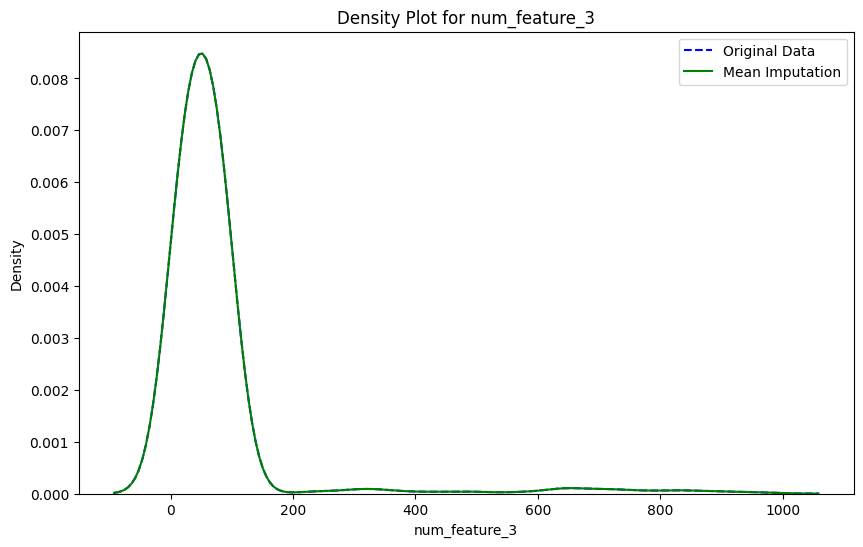

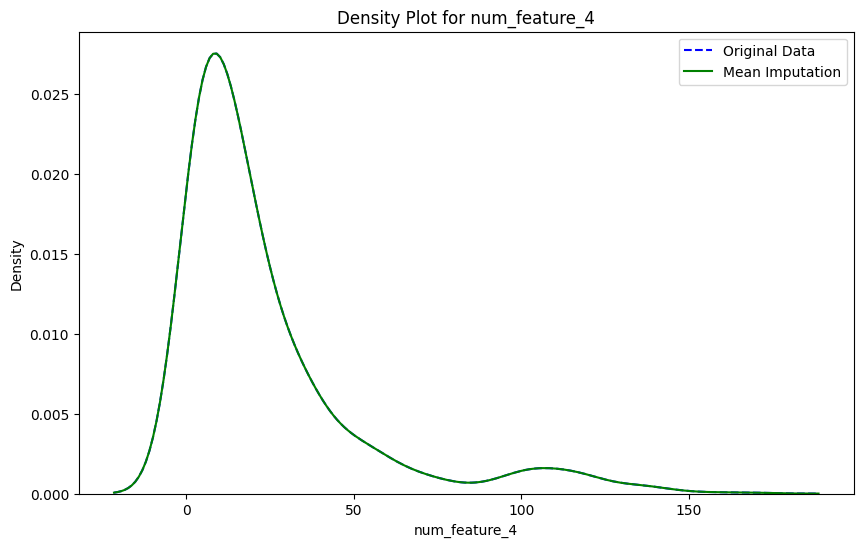


DataFrame Description After Combined Imputation:
       num_feature_1  num_feature_2  num_feature_3  num_feature_4
count    1000.000000    1000.000000    1000.000000    1000.000000
mean       50.208753      30.364511      73.452402      23.850258
std         9.361148       4.888582     123.079278      28.529768
min        17.587327      15.298057       0.001163       0.000614
25%        44.004013      27.095936      25.322967       5.833381
50%        50.197189      30.363588      51.969723      14.313764
75%        56.171197      33.540676      78.144736      29.019209
max        80.788808      45.965538     966.047505     167.221882

Comparing Density Plots with Combined Imputation


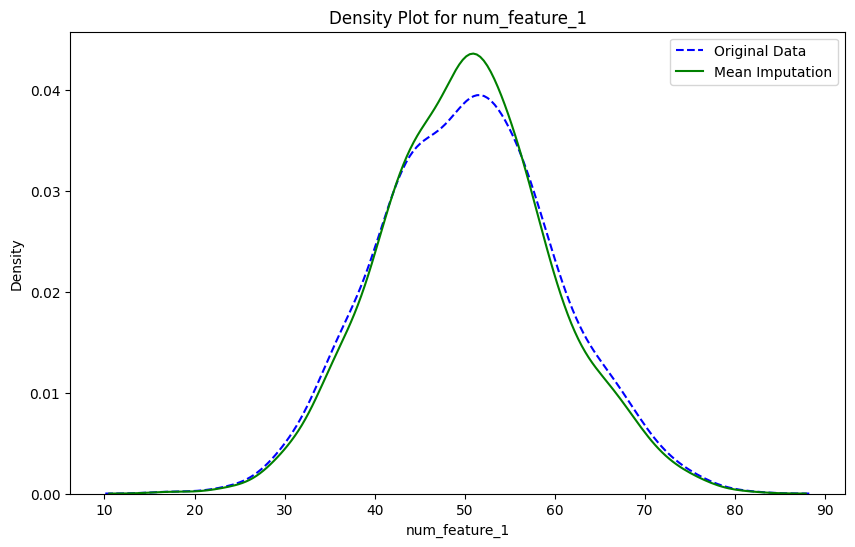

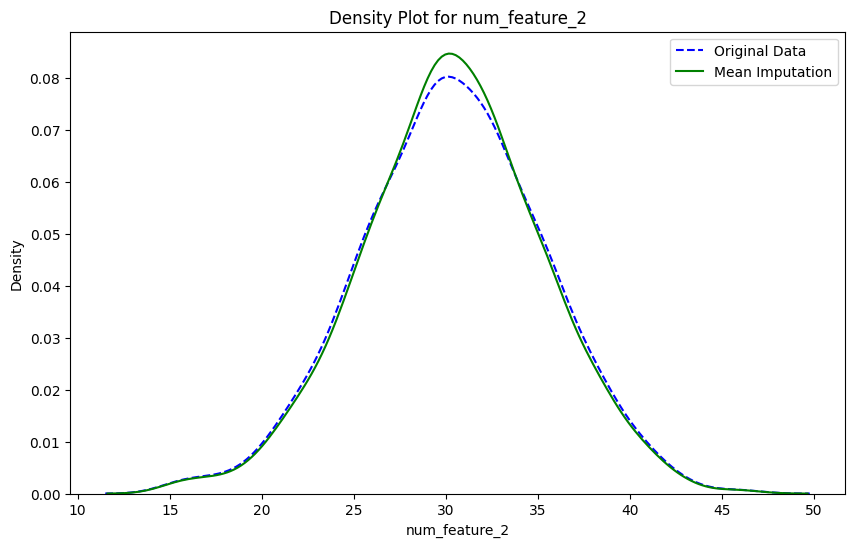

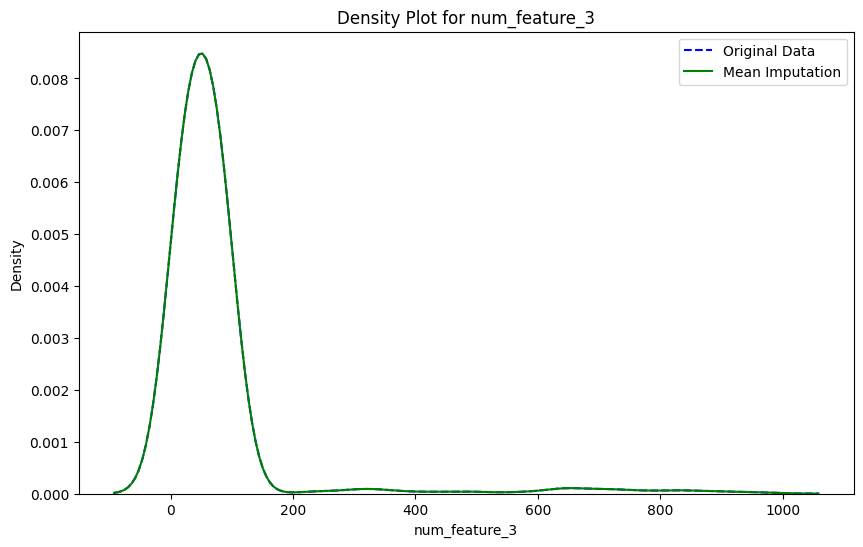

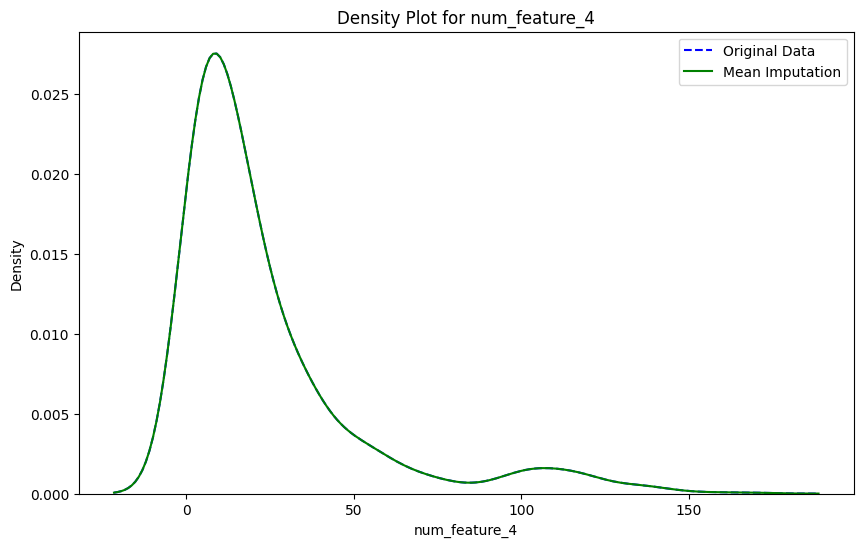


DataFrame Description After Combined Imputation:
       num_feature_1  num_feature_2  num_feature_3  num_feature_4
count    1000.000000    1000.000000    1000.000000    1000.000000
mean       50.208753      30.364511      73.452402      23.850258
std         9.361148       4.888582     123.079278      28.529768
min        17.587327      15.298057       0.001163       0.000614
25%        44.004013      27.095936      25.322967       5.833381
50%        50.197189      30.363588      51.969723      14.313764
75%        56.171197      33.540676      78.144736      29.019209
max        80.788808      45.965538     966.047505     167.221882


In [ ]:
# Apply kNN Imputation to the specified numerical features
df_knn_specific = df.copy()
imputer_knn = KNNImputer(n_neighbors=5)
df_knn_specific[['num_feature_1', 'num_feature_2']] = imputer_knn.fit_transform(df[['num_feature_1', 'num_feature_2']])

# Apply Mean Imputation to the specified numerical feature
df_mean_specific = df.copy()
imputer_mean = SimpleImputer(strategy='mean')
df_mean_specific[['num_feature_3']] = imputer_mean.fit_transform(df[['num_feature_3']])

# Apply Median Imputation to the specified numerical feature
df_median_specific = df.copy()
imputer_median = SimpleImputer(strategy='median')
df_median_specific[['num_feature_4']] = imputer_median.fit_transform(df[['num_feature_4']])

# Combine the imputed features into one DataFrame
df_combined = df.copy()
df_combined[['num_feature_1', 'num_feature_2']] = df_knn_specific[['num_feature_1', 'num_feature_2']]
df_combined[['num_feature_3']] = df_mean_specific[['num_feature_3']]
df_combined[['num_feature_4']] = df_median_specific[['num_feature_4']]

# Re-run the density plot with combined imputation
print("\nComparing Density Plots with Combined Imputation")
plot_comparisons(df, [df_combined], num_features, plot_type='density')

# Describe the final DataFrame with combined imputation
print("\nDataFrame Description After Combined Imputation:")
print(df_combined.describe())

df_mode_specific = df.copy()
for feature in cat_features:
    imputer_mode = SimpleImputer(strategy='most_frequent')
    df_mode_specific[[feature]] = imputer_mode.fit_transform(df[[feature]])

# Combine the imputed categorical features into the final DataFrame
df_combined[cat_features] = df_mode_specific[cat_features]

# Re-run the density plot with combined imputation
print("\nComparing Density Plots with Combined Imputation")
plot_comparisons(df, [df_combined], num_features, plot_type='density')

# Describe the final DataFrame with combined imputation
print("\nDataFrame Description After Combined Imputation:")
print(df_combined.describe())

# Optional: Save the DataFrame to a CSV file
df_combined.to_csv('df_combined_imputed.csv', index=False)



In [ ]:

# Check for missing values before imputation
print("Missing Values Before Imputation:")
print(df.isnull().sum())

# Check for missing values after imputation
print("\nMissing Values After Imputation:")
print(df_combined.isnull().sum())


Missing Values Before Imputation:
num_feature_1    100
num_feature_2     50
num_feature_3      0
num_feature_4      0
cat_feature_1      0
cat_feature_2      0
dtype: int64

Missing Values After Imputation:
num_feature_1    0
num_feature_2    0
num_feature_3    0
num_feature_4    0
cat_feature_1    0
cat_feature_2    0
dtype: int64


In [ ]:
print(df_combined.columns)
print(df_combined.head())


Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'cat_feature_1', 'cat_feature_2'],
      dtype='object')
   num_feature_1  num_feature_2  num_feature_3  num_feature_4 cat_feature_1  \
0      54.967142      36.996777     407.106489       7.202748             A   
1      48.617357      34.623168       6.600984      16.575140             A   
2      56.476885      30.298152     348.820534      32.572913             B   
3      65.230299      26.765316      11.099810       2.950253             n   
4      47.658466      33.491117      80.823521      17.383329             A   

  cat_feature_2  
0             Y  
1             Y  
2             X  
3             Y  
4             X  


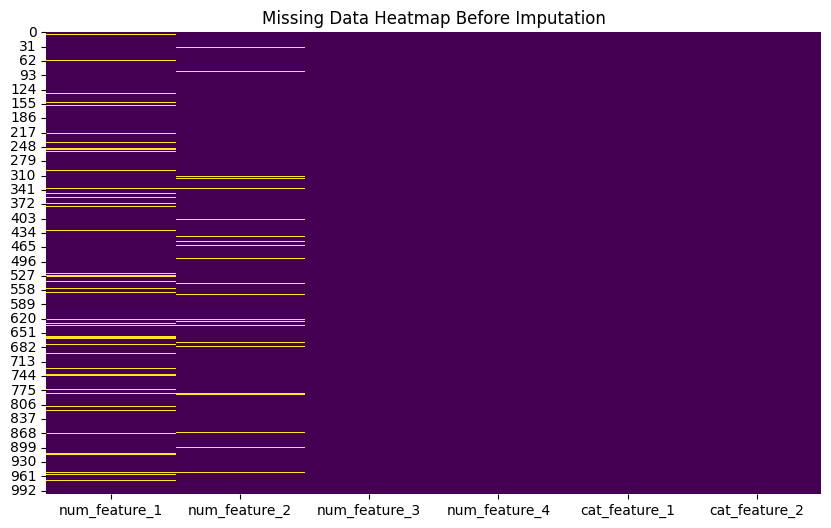

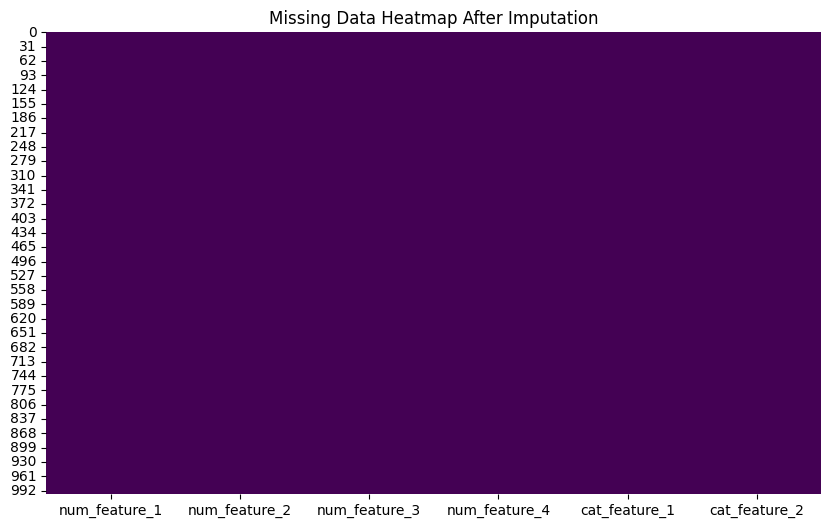

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap Before Imputation')
plt.show()

# After Imputation
plt.figure(figsize=(10, 6))
sns.heatmap(df_combined.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap After Imputation')
plt.show()


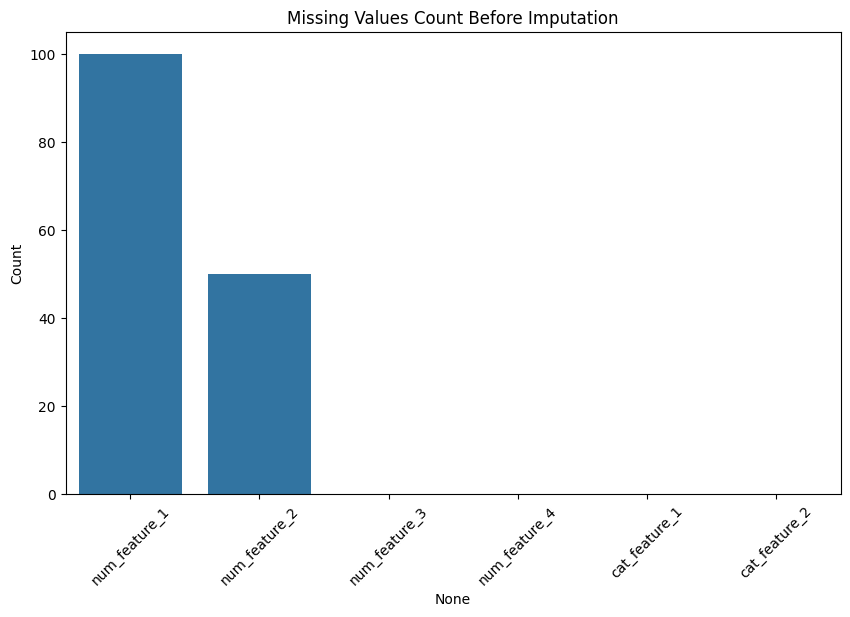

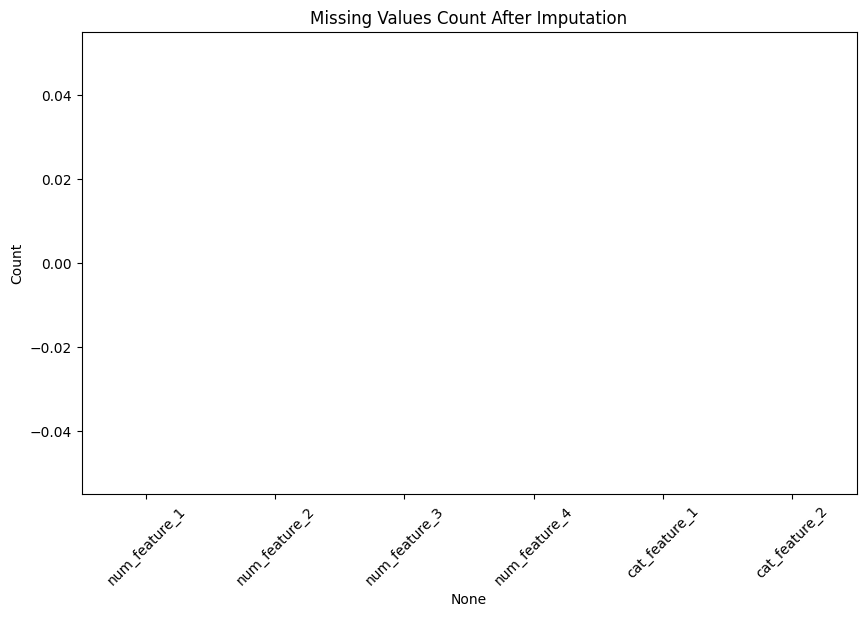

In [ ]:
missing_values_before = df.isnull().sum()
missing_values_after = df_combined.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_before.index, y=missing_values_before.values)
plt.title('Missing Values Count Before Imputation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_after.index, y=missing_values_after.values)
plt.title('Missing Values Count After Imputation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


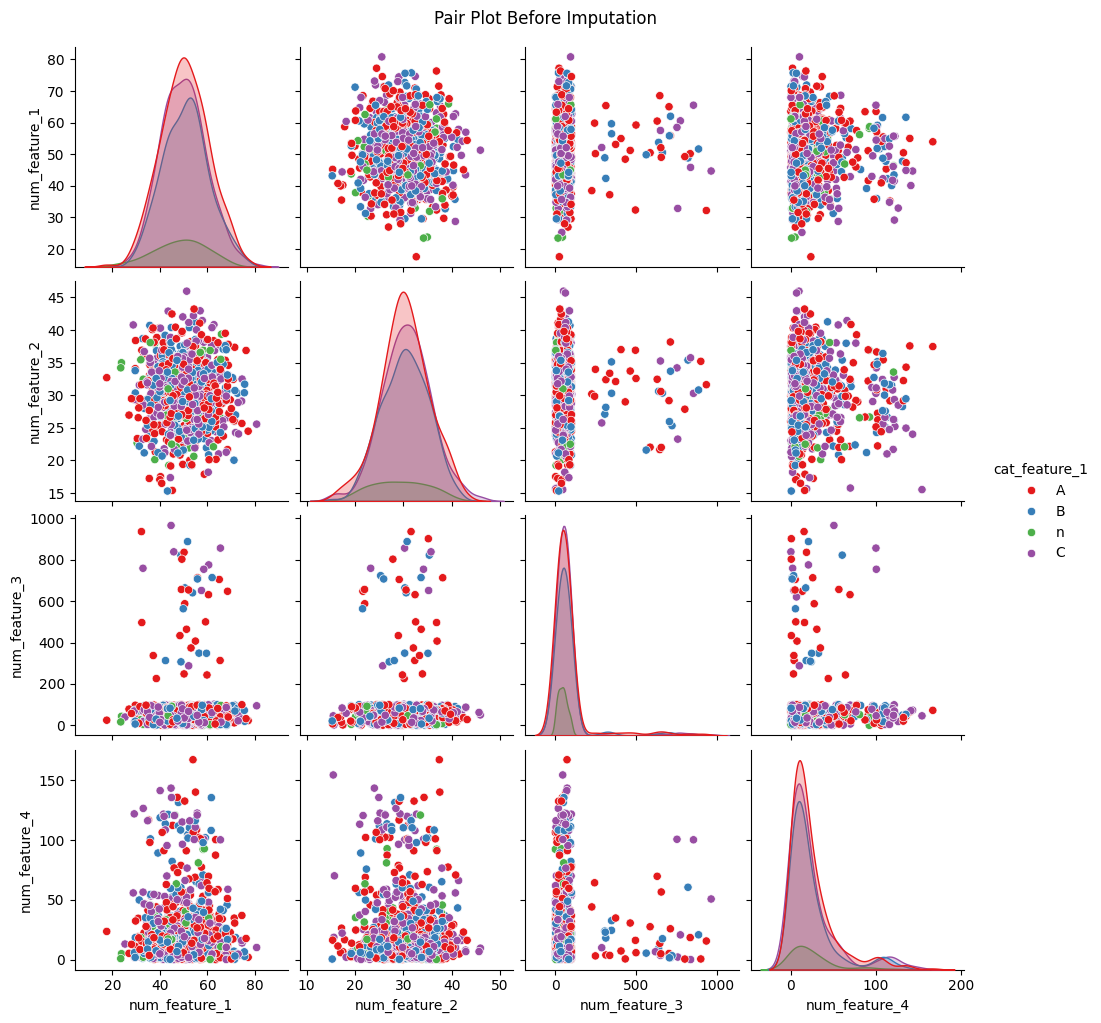

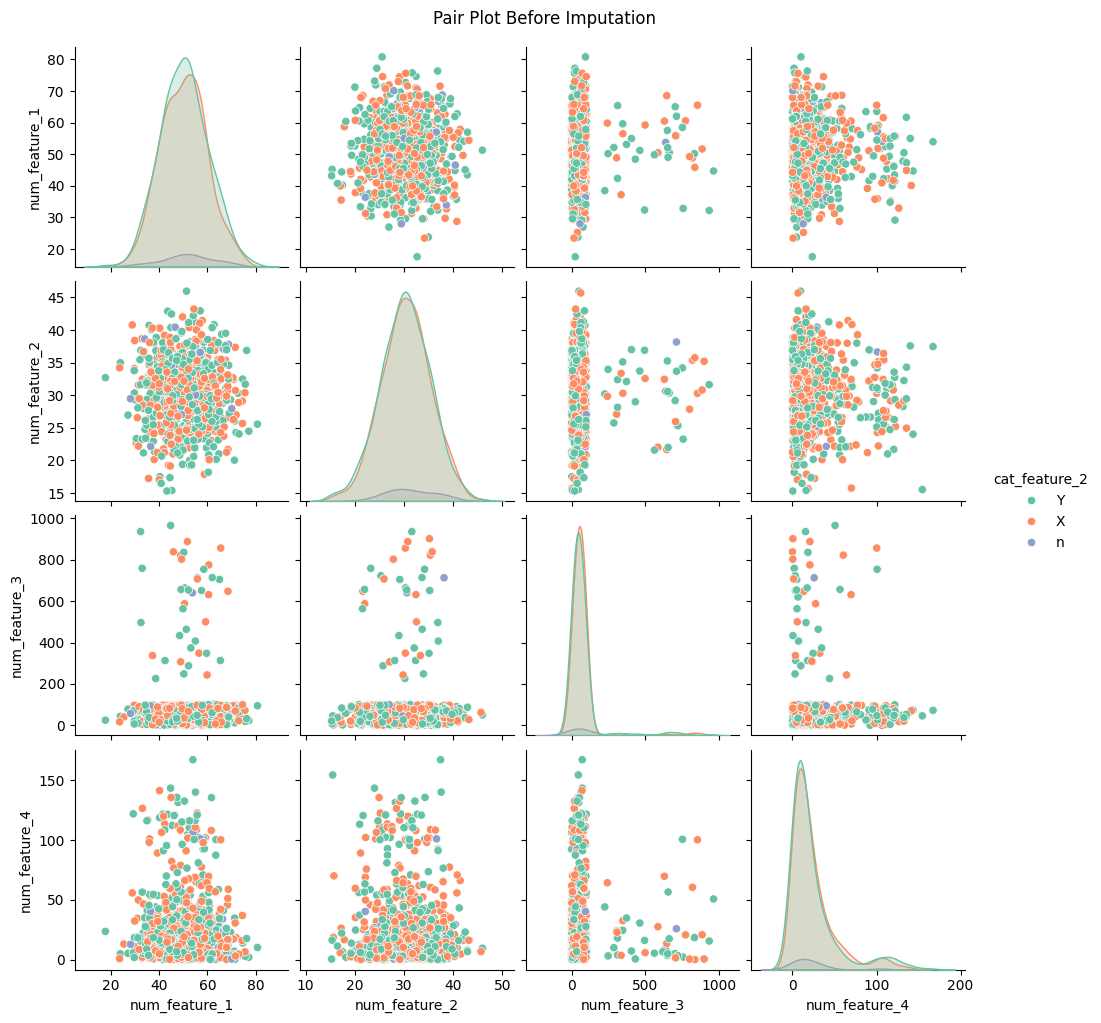

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot Before Imputation with cat_feature_1 as hue
sns.pairplot(df[num_features + ['cat_feature_1', 'cat_feature_2']], hue='cat_feature_1', palette='Set1')
plt.suptitle('Pair Plot Before Imputation', y=1.02)
plt.show()

# Pair Plot Before Imputation with cat_feature_2 as hue
sns.pairplot(df[num_features + ['cat_feature_1', 'cat_feature_2']], hue='cat_feature_2', palette='Set2')
plt.suptitle('Pair Plot Before Imputation', y=1.02)
plt.show()


In [ ]:
print("\nDataFrame Description After Combined Imputation:")
print(df_combined.describe(include='all'))



DataFrame Description After Combined Imputation:
        num_feature_1  num_feature_2  num_feature_3  num_feature_4  \
count     1000.000000    1000.000000    1000.000000    1000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        50.208753      30.364511      73.452402      23.850258   
std          9.361148       4.888582     123.079278      28.529768   
min         17.587327      15.298057       0.001163       0.000614   
25%         44.004013      27.095936      25.322967       5.833381   
50%         50.197189      30.363588      51.969723      14.313764   
75%         56.171197      33.540676      78.144736      29.019209   
max         80.788808      45.965538     966.047505     167.221882   

       cat_feature_1 cat_feature_2  
count           1000          1000  
unique             4             3 

## Handling Outliers:

**Z-Score Method:** After handling missing data, identify outliers using the Z-score method and replace them with the mean or median of the data.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

def count_outliers_numerical(df, num_features):
    outlier_counts = {}
    threshold = 3  # Z-Score threshold for outliers

    for feature in num_features:
        df[feature + '_zscore'] = zscore(df[feature])
        is_outlier = abs(df[feature + '_zscore']) > threshold
        outlier_counts[feature] = is_outlier.sum()

    # Drop Z-Score columns
    df = df.drop(columns=[feature + '_zscore' for feature in num_features])

    return outlier_counts

def count_outliers_categorical(df, cat_features):
    outlier_counts = {}

    for feature in cat_features:
        # Count occurrences of 'n'
        outlier_counts[feature] = (df[feature] == 'n').sum()

    return outlier_counts

def replace_outliers_zscore(df, num_features, method='median'):
    threshold = 3
    df_outliers = df.copy()
    outlier_counts = count_outliers_numerical(df_outliers, num_features)

    while any(count > 0 for count in outlier_counts.values()):
        for feature in num_features:
            df_outliers[feature + '_zscore'] = zscore(df_outliers[feature])
            is_outlier = abs(df_outliers[feature + '_zscore']) > threshold

            # Replacement value
            if method == 'median':
                replacement_value = df_outliers[feature].median()
            elif method == 'mean':
                replacement_value = df_outliers[feature].mean()
            else:
                raise ValueError("Method must be 'median' or 'mean'")

            # Replace outliers
            df_outliers.loc[is_outlier, feature] = replacement_value

            # Drop Z-Score column for the next iteration
            df_outliers = df_outliers.drop(columns=[feature + '_zscore'])

        outlier_counts = count_outliers_numerical(df_outliers, num_features)

    return df_outliers

def handle_categorical_outliers(df, cat_features):
    df_outliers = df.copy()

    for feature in cat_features:
        # Replace 'n' with NaN and then use SimpleImputer to replace with mode
        df_outliers[feature] = df_outliers[feature].replace('n', np.nan)
        imputer = SimpleImputer(strategy='most_frequent')

        df_outliers[feature] = imputer.fit_transform(df_outliers[[feature]]).ravel()

    return df_outliers


num_features = ['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4']
cat_features = ['cat_feature_1', 'cat_feature_2']

# Count and print outliers before handling
print("\nNumber of Outliers Before Handling:")
outliers_before_numerical = count_outliers_numerical(df_combined, num_features)
for feature, count in outliers_before_numerical.items():
    print(f"{feature}: {count}")

outliers_before_categorical = count_outliers_categorical(df_combined, cat_features)
for feature, count in outliers_before_categorical.items():
    print(f"{feature}: {count}")
df_combined_before = df_combined.copy()

df_outliers_handled = replace_outliers_zscore(df_combined, num_features, method='median')

df_outliers_handled = handle_categorical_outliers(df_outliers_handled, cat_features)

# Count and print outliers after handling
print("\nNumber of Outliers After Handling:")
outliers_after_numerical = count_outliers_numerical(df_outliers_handled, num_features)
for feature, count in outliers_after_numerical.items():
    print(f"{feature}: {count}")

outliers_after_categorical = count_outliers_categorical(df_outliers_handled, cat_features)
for feature, count in outliers_after_categorical.items():
    print(f"{feature}: {count}")


df_outliers_handled.to_csv('df_combined_imputed_handled.csv', index=False)



Number of Outliers Before Handling:
num_feature_1: 2
num_feature_2: 6
num_feature_3: 30
num_feature_4: 34
cat_feature_1: 50
cat_feature_2: 30

Number of Outliers After Handling:
num_feature_1: 0
num_feature_2: 0
num_feature_3: 0
num_feature_4: 0
cat_feature_1: 0
cat_feature_2: 0


In [ ]:
print(df_outliers_handled.columns)

Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'cat_feature_1', 'cat_feature_2', 'num_feature_1_zscore',
       'num_feature_2_zscore', 'num_feature_3_zscore', 'num_feature_4_zscore'],
      dtype='object')


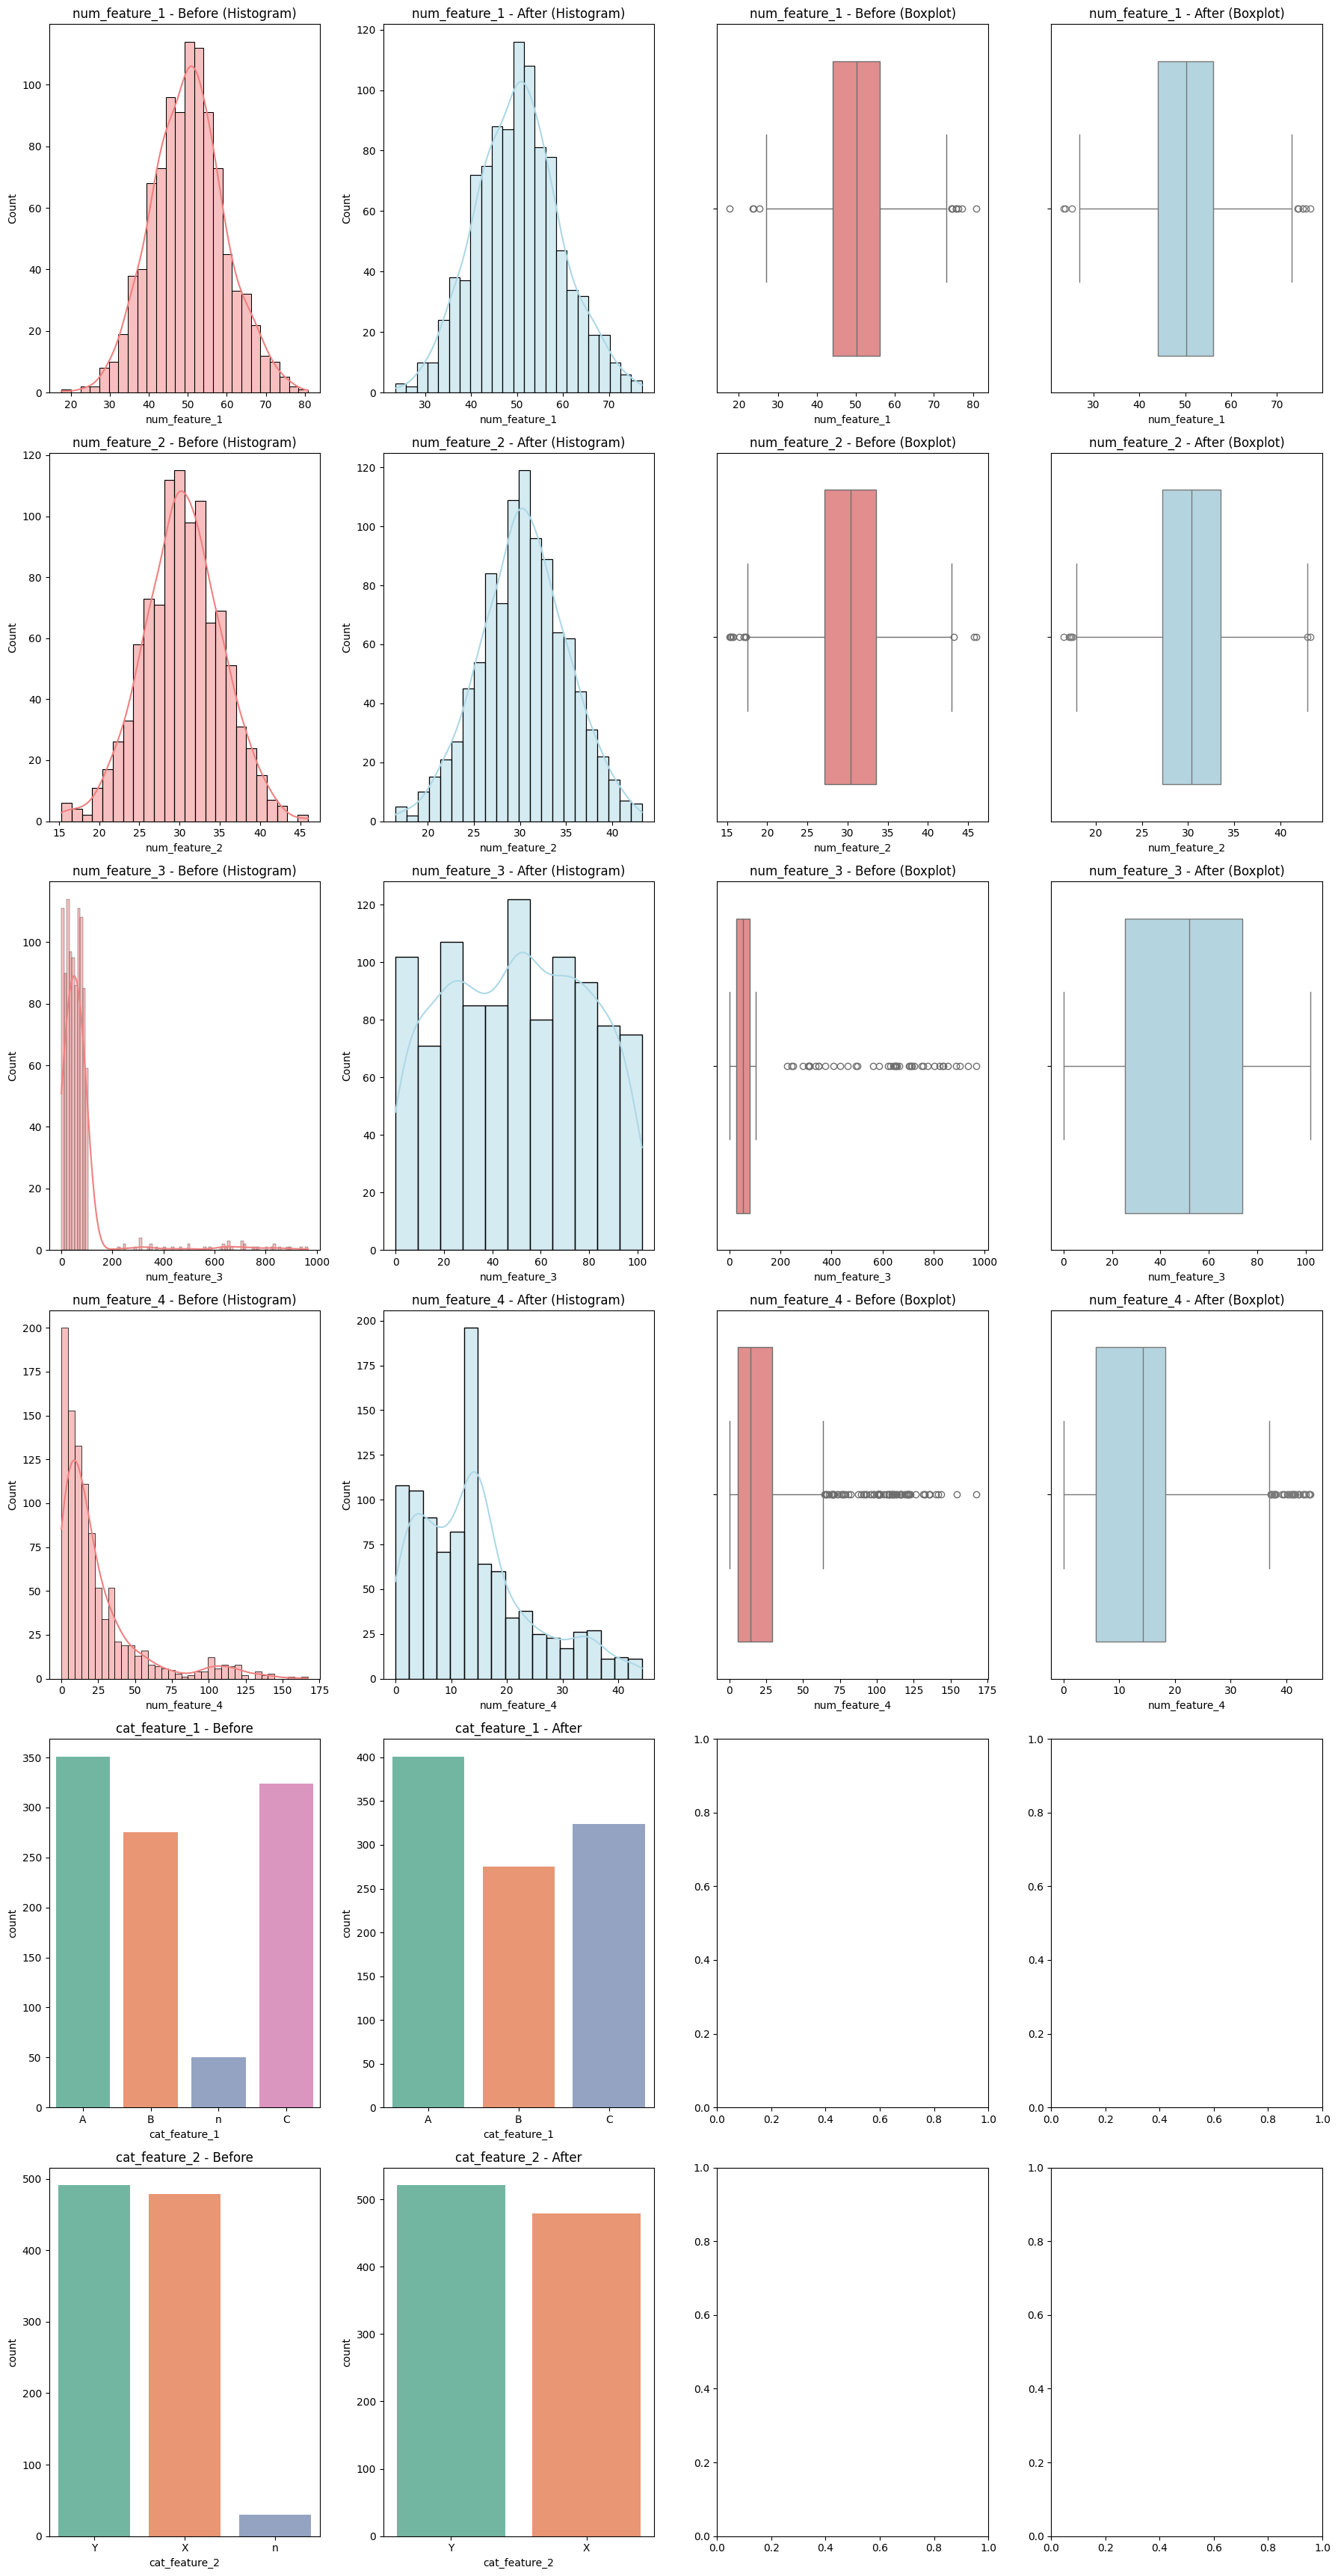

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_features(df_before, df_after, num_features, cat_features):

    num_plots = len(num_features)
    cat_plots = len(cat_features)

    # Create subplots
    fig, axes = plt.subplots(num_plots + cat_plots, 4, figsize=(18, 6 * (num_plots + cat_plots)))

    # Plot numerical features
    for i, feature in enumerate(num_features):
        # Histogram before
        sns.histplot(df_before[feature], kde=True, ax=axes[i, 0], color='lightcoral')
        axes[i, 0].set_title(f'{feature} - Before (Histogram)')

        # Histogram after
        sns.histplot(df_after[feature], kde=True, ax=axes[i, 1], color='lightblue')
        axes[i, 1].set_title(f'{feature} - After (Histogram)')

        # Boxplot before
        sns.boxplot(x=df_before[feature], ax=axes[i, 2], color='lightcoral')
        axes[i, 2].set_title(f'{feature} - Before (Boxplot)')

        # Boxplot after
        sns.boxplot(x=df_after[feature], ax=axes[i, 3], color='lightblue')
        axes[i, 3].set_title(f'{feature} - After (Boxplot)')

    # Plot categorical features
    for j, feature in enumerate(cat_features):
        idx = num_plots + j
        # Count plot before
        sns.countplot(x=df_before[feature], ax=axes[idx, 0], hue=df_before[feature], palette='Set2', legend=False)
        axes[idx, 0].set_title(f'{feature} - Before')

        # Count plot after
        sns.countplot(x=df_after[feature], ax=axes[idx, 1], hue=df_after[feature], palette='Set2', legend=False)
        axes[idx, 1].set_title(f'{feature} - After')

    # Remove unused subplots
    for k in range(num_plots + cat_plots, len(axes)):
        fig.delaxes(axes[k // 4, k % 4])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


plot_all_features(df_combined_before, df_outliers_handled, num_features, cat_features)


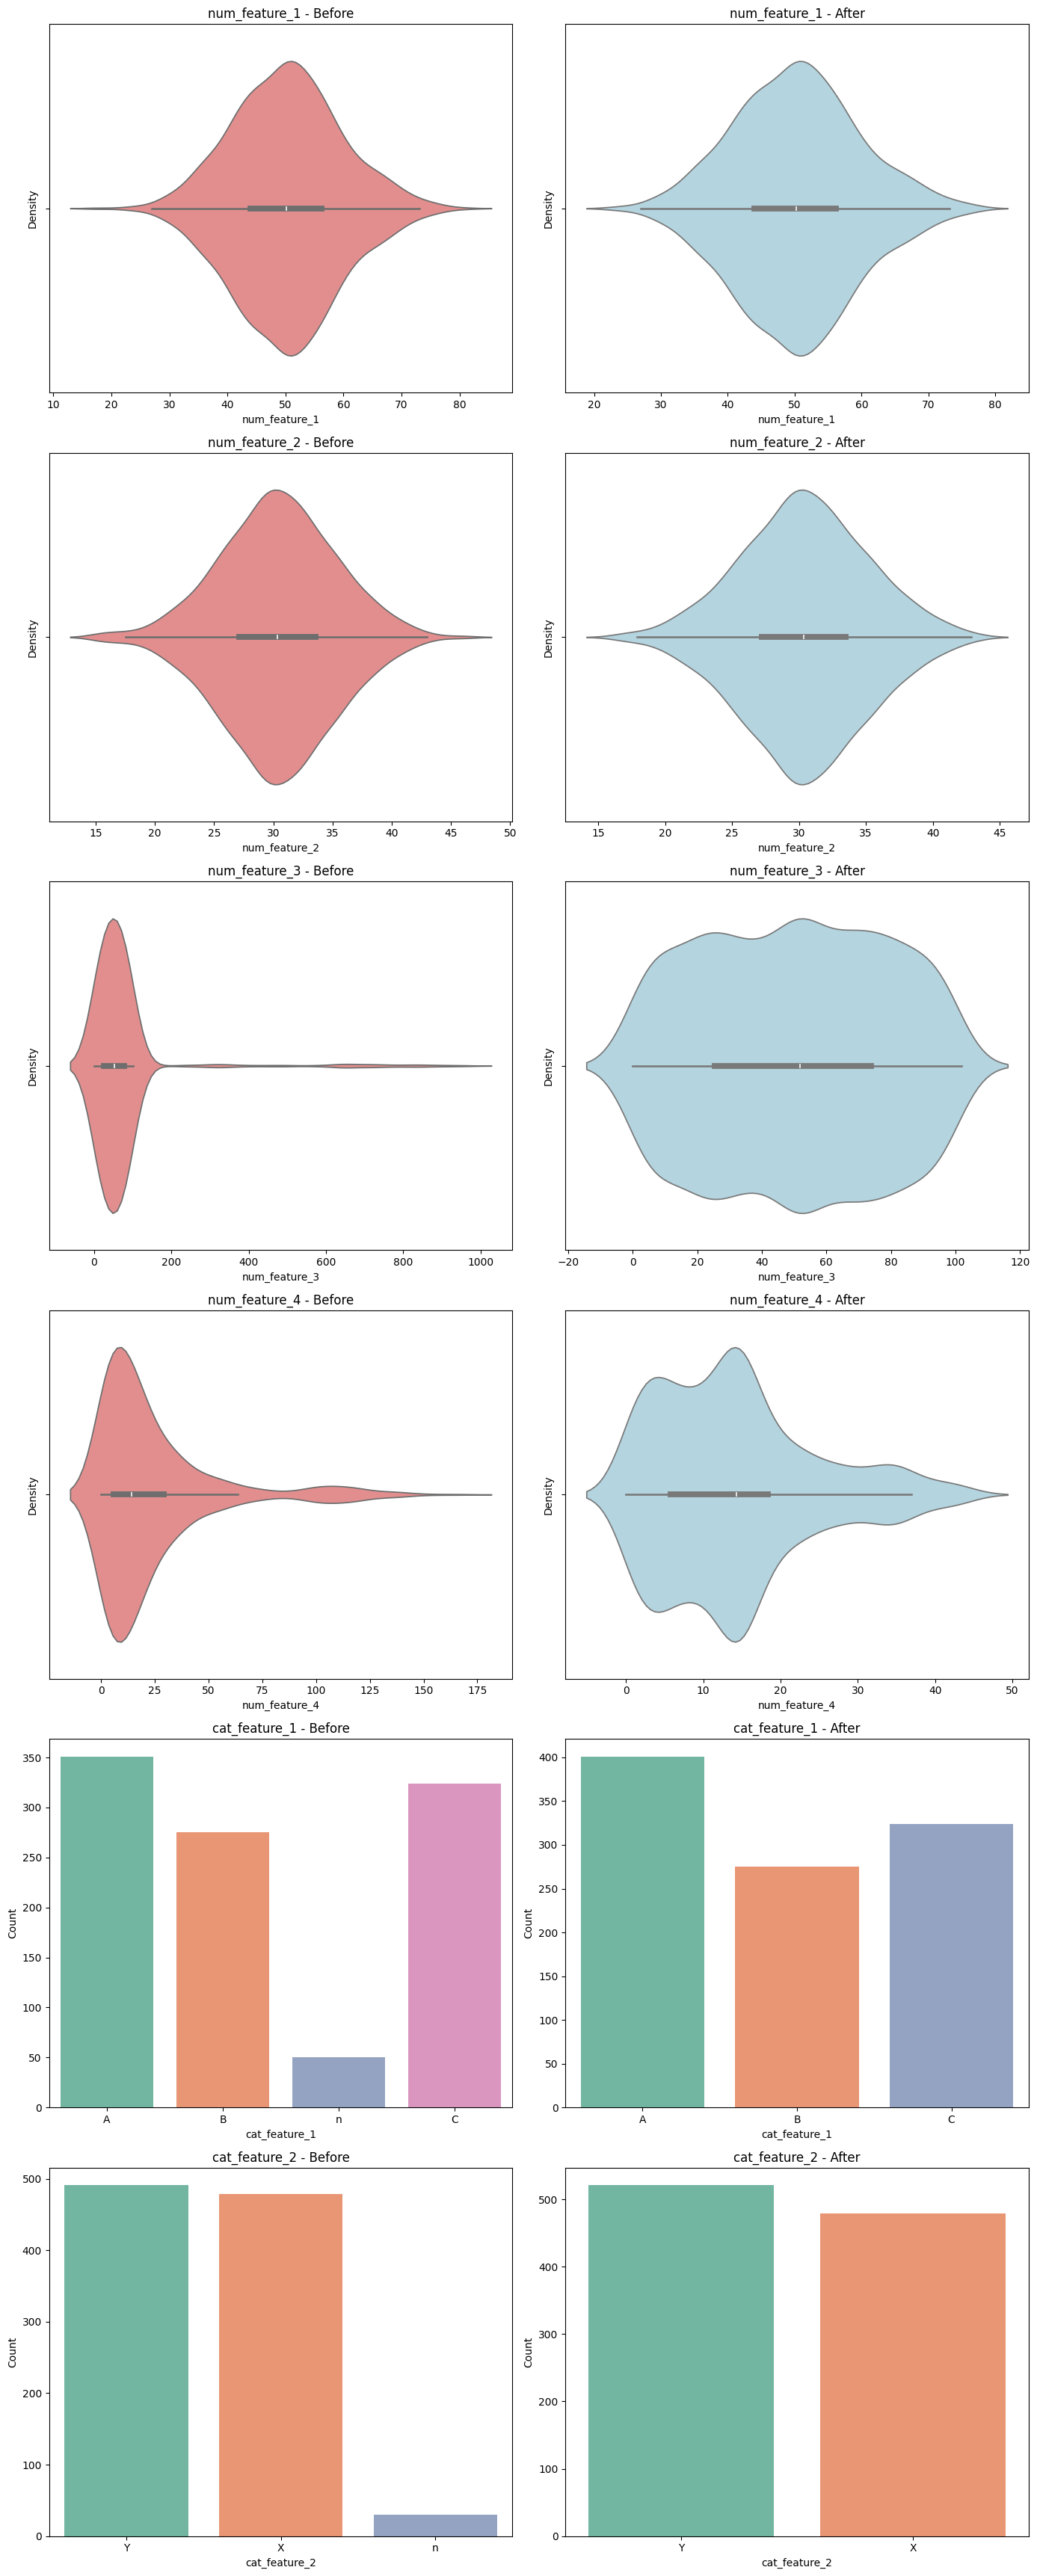

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_features(df_before, df_after, num_features, cat_features):

    num_plots = len(num_features)
    cat_plots = len(cat_features)

    # Create subplots
    fig, axes = plt.subplots(num_plots + cat_plots, 2, figsize=(14, 6 * (num_plots + cat_plots)))

    # Plot numerical features
    for i, feature in enumerate(num_features):
        sns.violinplot(x=df_before[feature], ax=axes[i, 0], color='lightcoral')
        axes[i, 0].set_title(f'{feature} - Before')
        axes[i, 0].set_xlabel(feature)
        axes[i, 0].set_ylabel('Density')

        sns.violinplot(x=df_after[feature], ax=axes[i, 1], color='lightblue')
        axes[i, 1].set_title(f'{feature} - After')
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].set_ylabel('Density')

    # Plot categorical features
    for j, feature in enumerate(cat_features):
        idx = num_plots + j
        sns.countplot(x=df_before[feature], ax=axes[idx, 0], hue=df_before[feature], palette='Set2', legend=False)
        axes[idx, 0].set_title(f'{feature} - Before')
        axes[idx, 0].set_xlabel(feature)
        axes[idx, 0].set_ylabel('Count')

        sns.countplot(x=df_after[feature], ax=axes[idx, 1], hue=df_after[feature], palette='Set2', legend=False)
        axes[idx, 1].set_title(f'{feature} - After')
        axes[idx, 1].set_xlabel(feature)
        axes[idx, 1].set_ylabel('Count')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


plot_features(df_combined_before, df_outliers_handled, num_features, cat_features)


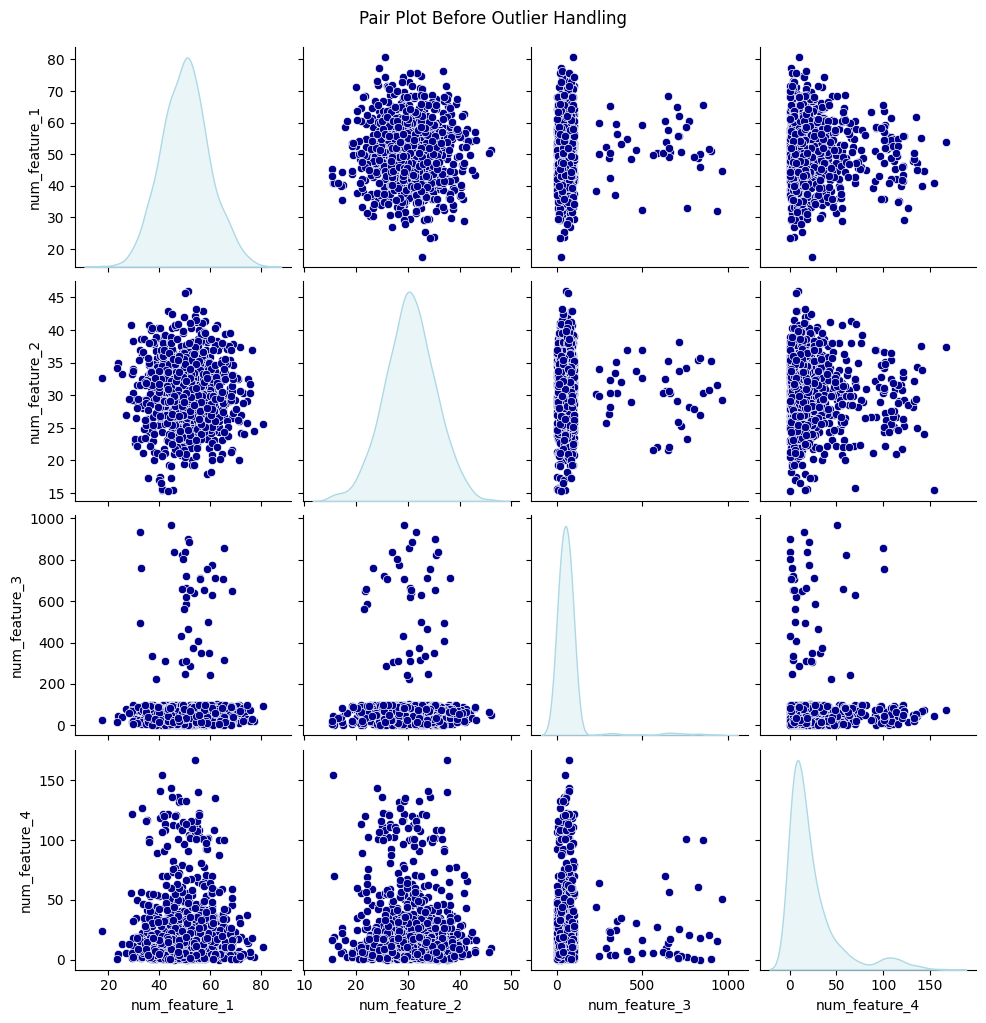

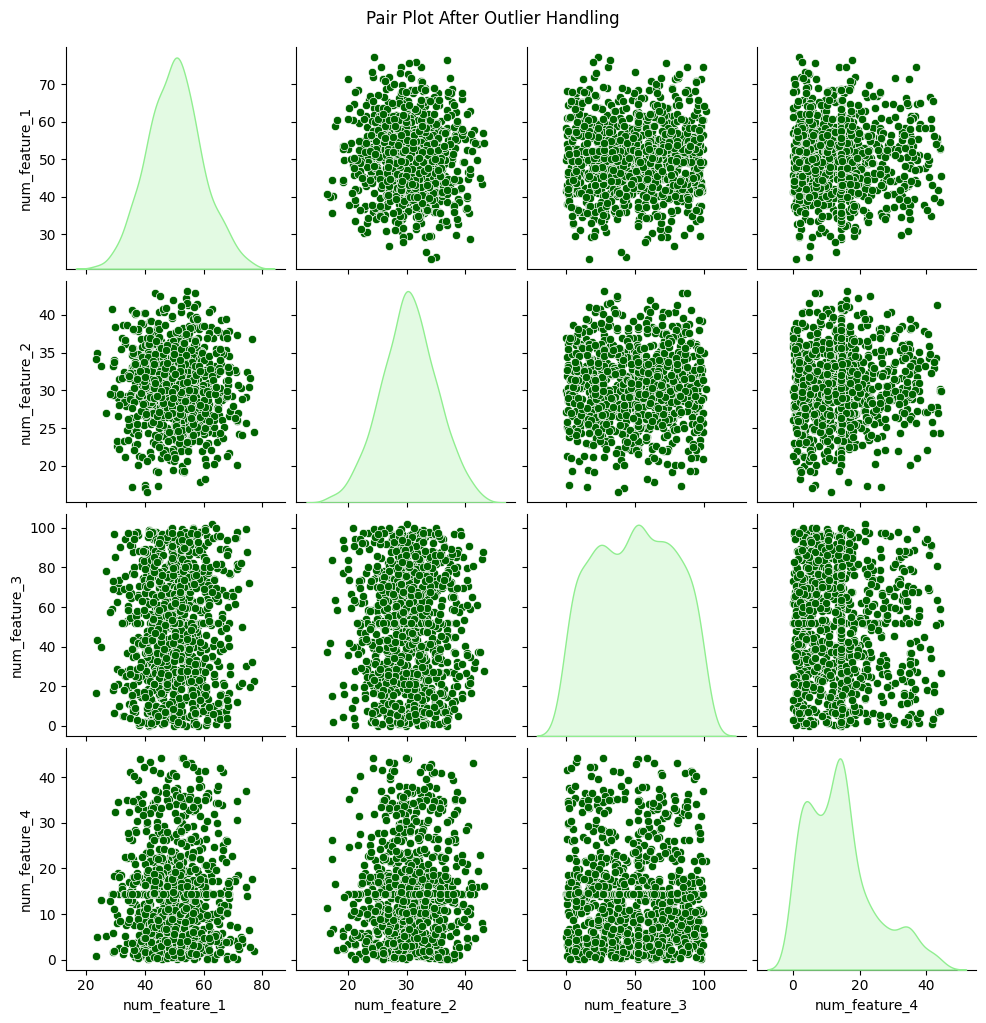

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pairplot_before_after(df_before, df_after, features):

    # Create pair plot for numerical features before outlier handling
    g_before = sns.pairplot(df_before[features], diag_kind="kde",
                           plot_kws={'color': 'darkblue'},
                           diag_kws={'color': 'lightblue'})
    g_before.fig.suptitle('Pair Plot Before Outlier Handling', y=1.02)
    plt.show()

    # Create pair plot for numerical features after outlier handling
    g_after = sns.pairplot(df_after[features], diag_kind="kde",
                          plot_kws={'color': 'darkgreen'},
                          diag_kws={'color': 'lightgreen'})
    g_after.fig.suptitle('Pair Plot After Outlier Handling', y=1.02)
    plt.show()


plot_pairplot_before_after(df_combined_before, df_outliers_handled, num_features)


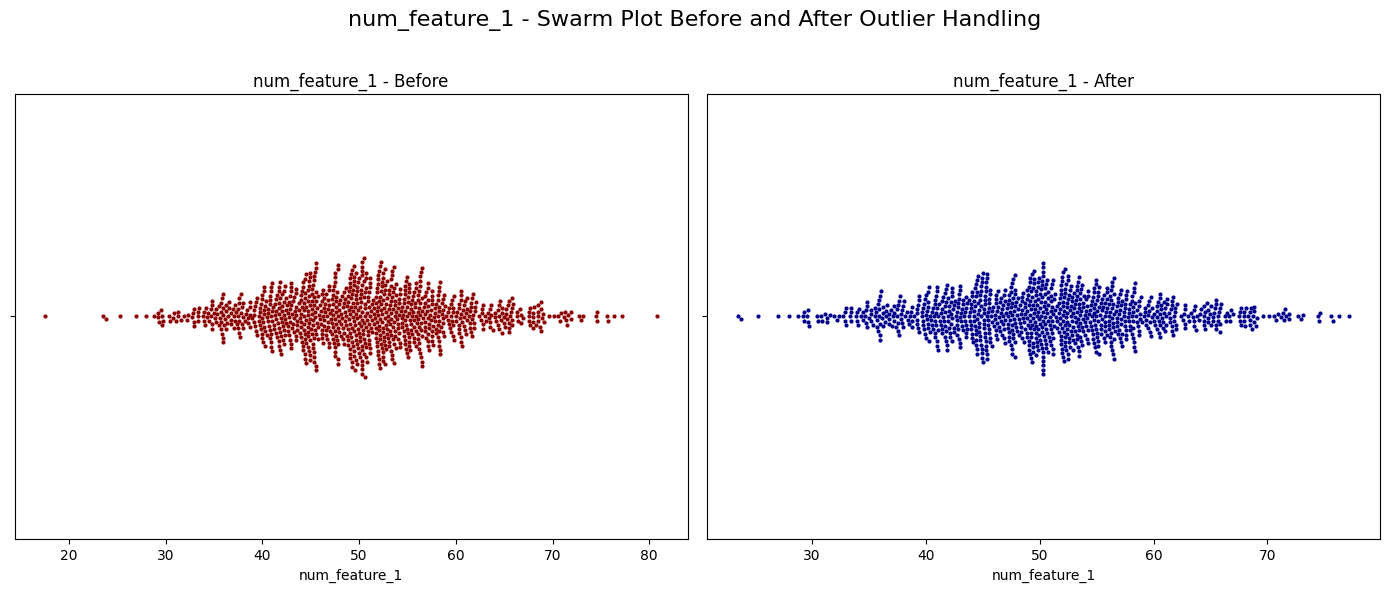

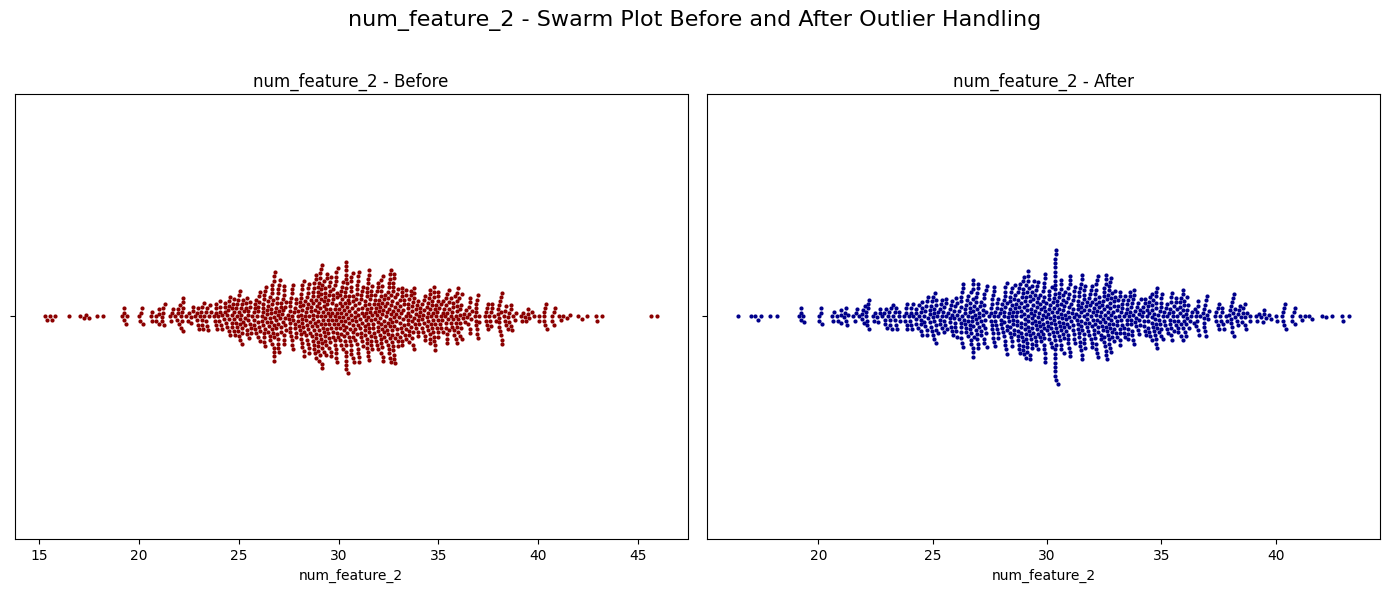

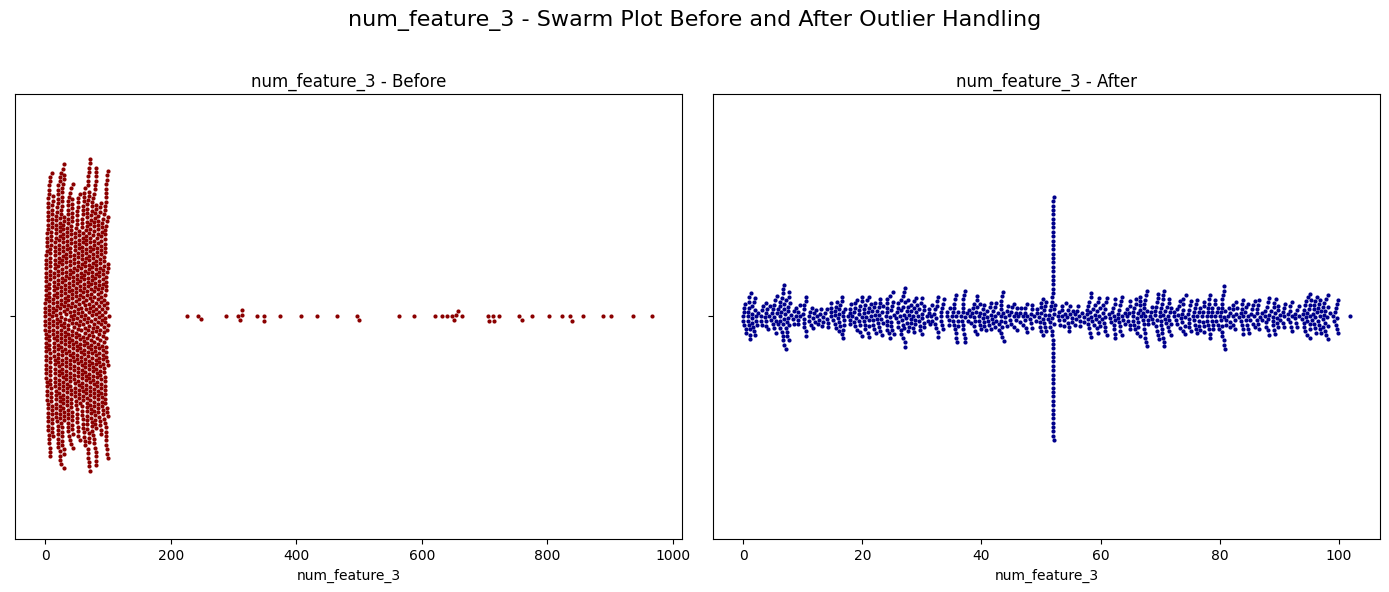

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


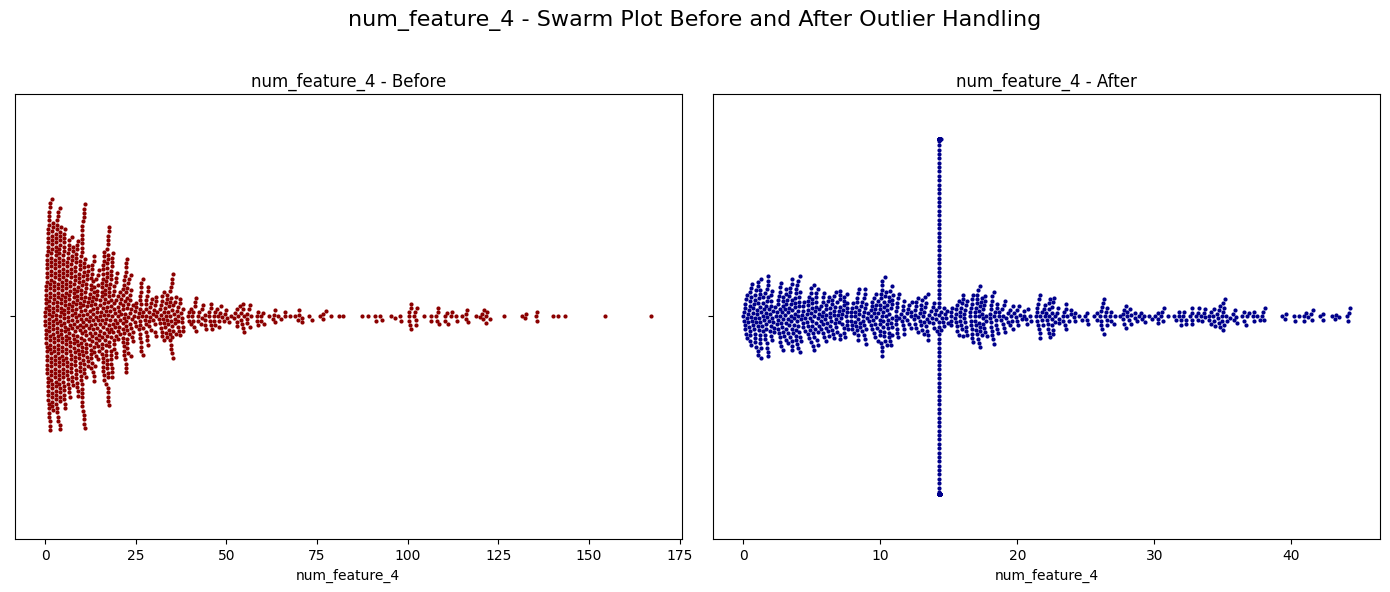

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_swarm_features_before_after(df_before, df_after, features):

    for feature in features:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'{feature} - Swarm Plot Before and After Outlier Handling', fontsize=16)

        # Swarm plot before
        sns.swarmplot(x=df_before[feature], ax=axes[0], color='darkred', size=3)  # Reduced marker size
        axes[0].set_title(f'{feature} - Before')

        # Swarm plot after
        sns.swarmplot(x=df_after[feature], ax=axes[1], color='darkblue', size=3)  # Reduced marker size
        axes[1].set_title(f'{feature} - After')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()


num_features = ['num_feature_1', 'num_feature_2', 'num_feature_3','num_feature_4']
plot_swarm_features_before_after(df_combined_before, df_outliers_handled, num_features)


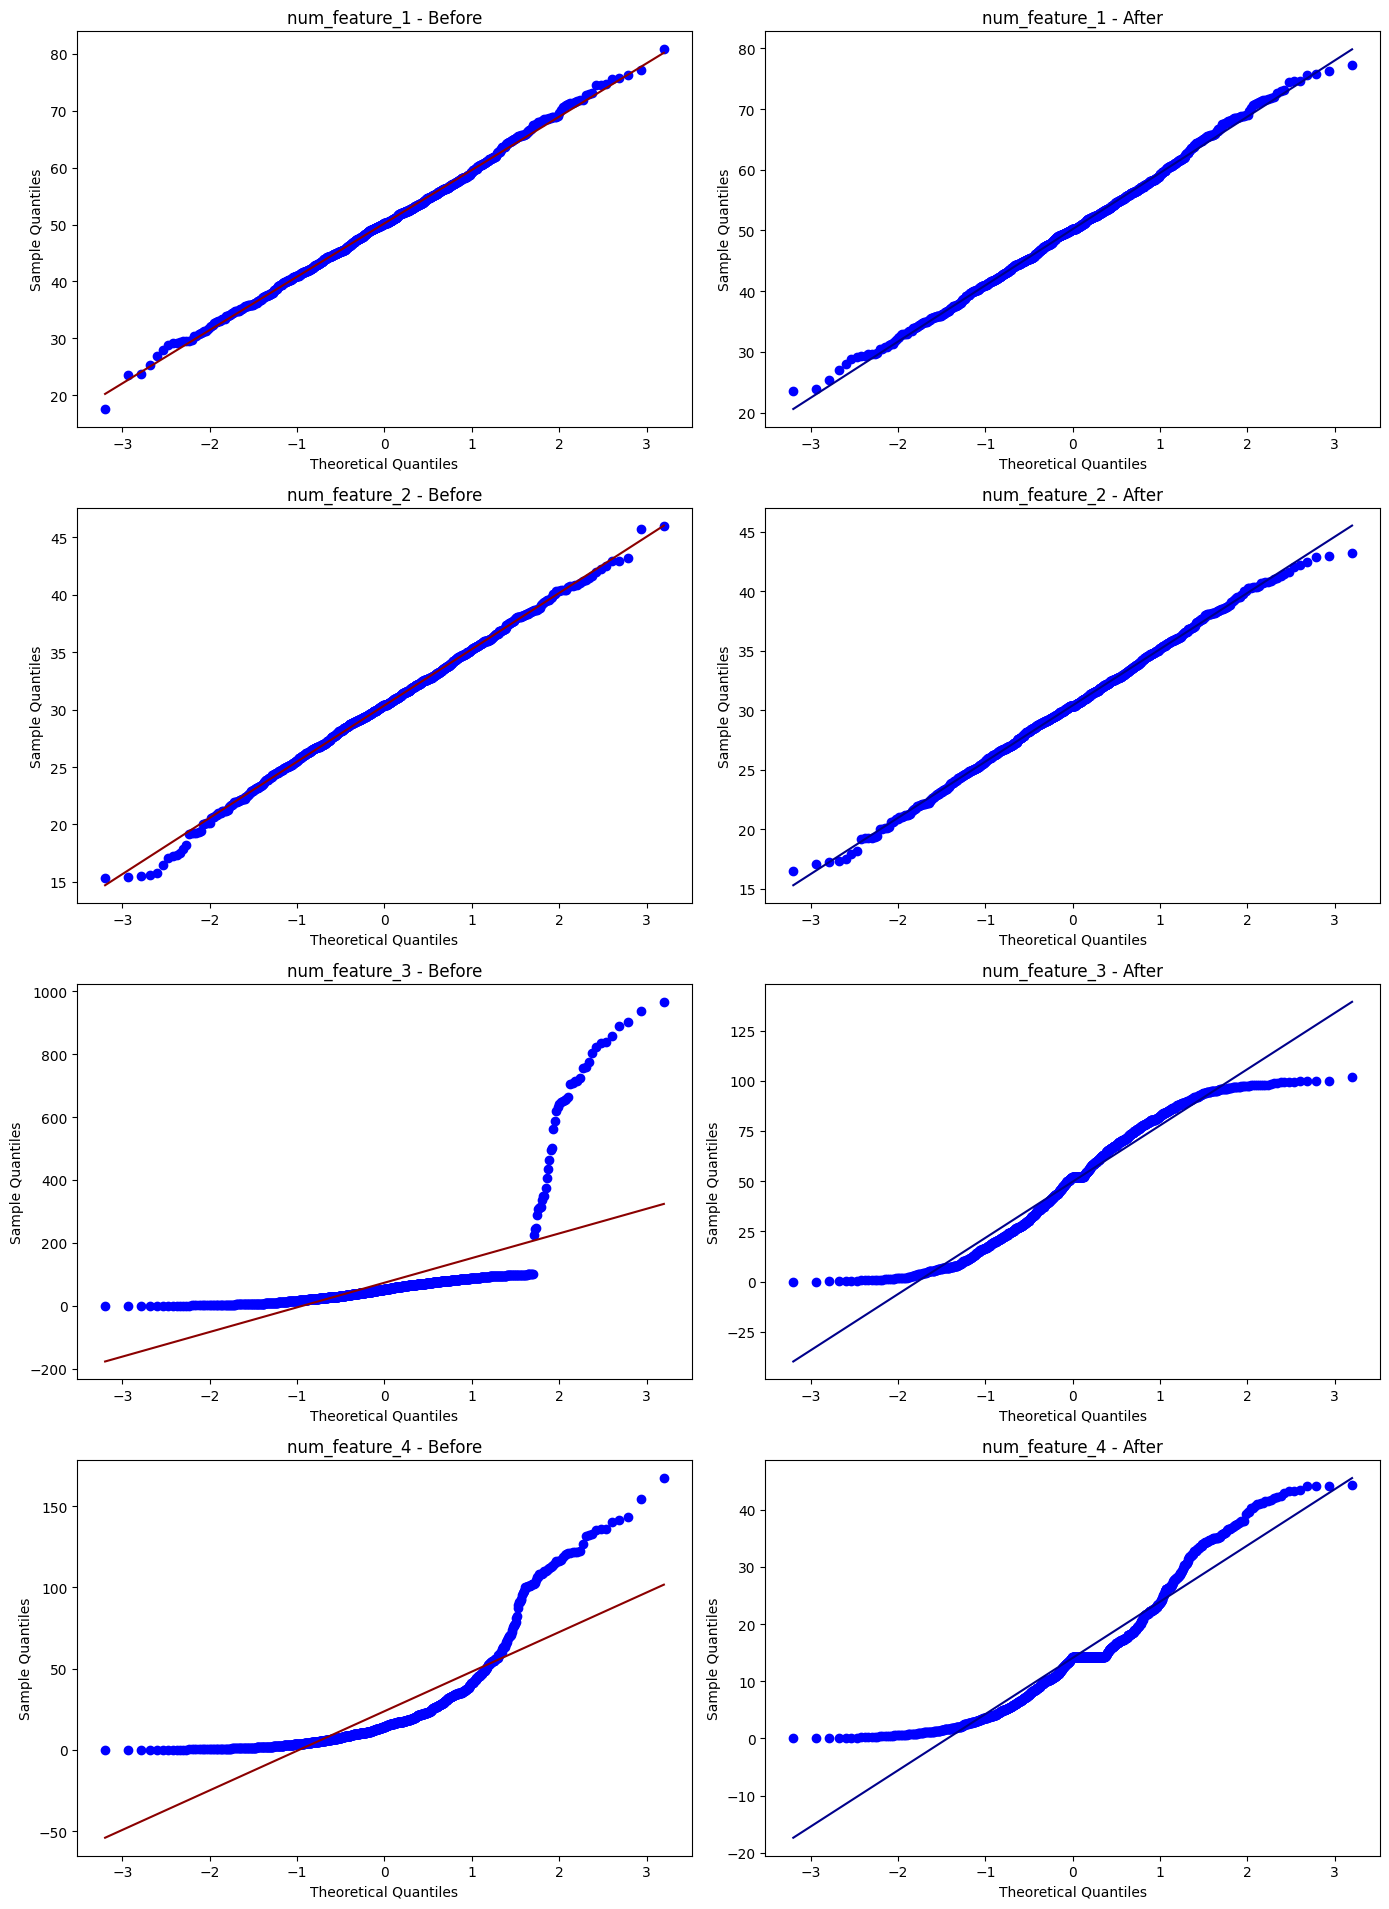

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_qq_features_before_after(df_before, df_after, features):

    num_features = len(features)
    fig, axes = plt.subplots(num_features, 2, figsize=(14, 5 * num_features))

    for i, feature in enumerate(features):
        # QQ plot before outlier handling
        stats.probplot(df_before[feature], dist="norm", plot=axes[i, 0])
        axes[i, 0].set_title(f'{feature} - Before')
        axes[i, 0].get_lines()[1].set_color('darkred')  # Customize line color
        axes[i, 0].set_xlabel('Theoretical Quantiles')
        axes[i, 0].set_ylabel('Sample Quantiles')

        # QQ plot after outlier handling
        stats.probplot(df_after[feature], dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'{feature} - After')
        axes[i, 1].get_lines()[1].set_color('darkblue')  # Customize line color
        axes[i, 1].set_xlabel('Theoretical Quantiles')
        axes[i, 1].set_ylabel('Sample Quantiles')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_qq_features_before_after(df_combined_before, df_outliers_handled, num_features)


## Handling Categorical Data:

**Label Encoding:** Convert categorical data to numerical values using label encoding.

**One-Hot Encoding:** Convert categorical data to a binary matrix using one-hot encoding.

### Tasks:

After handling outliers, apply both label encoding and one-hot encoding to the categorical features in your dataset.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def apply_label_encoding(df, cat_features):
    df_encoded = df.copy()
    le = LabelEncoder()

    for feature in cat_features:
        df_encoded[feature] = le.fit_transform(df_encoded[feature])

    return df_encoded

def apply_one_hot_encoding(df, cat_features):
    df_encoded = df.copy()
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # sparse_output=True or False

    # Apply one-hot encoding
    one_hot_encoded = one_hot_encoder.fit_transform(df_encoded[cat_features])

    # Create a DataFrame for one-hot encoded data
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(cat_features))

    # Drop original categorical columns and concatenate one-hot encoded DataFrame
    df_encoded = df_encoded.drop(columns=cat_features).reset_index(drop=True)
    df_encoded = pd.concat([df_encoded, one_hot_encoded_df], axis=1)

    return df_encoded


# After handling outliers
df_outliers_handled = replace_outliers_zscore(df_combined, num_features, method='median')
df_outliers_handled = handle_categorical_outliers(df_outliers_handled, cat_features)

# Apply Label Encoding
df_label_encoded = apply_label_encoding(df_outliers_handled, cat_features)

# Apply One-Hot Encoding
df_one_hot_encoded = apply_one_hot_encoding(df_outliers_handled, cat_features)


print("Label Encoded DataFrame (first 5 rows):")
print(df_label_encoded.head())

print("\nOne-Hot Encoded DataFrame (first 5 rows):")
print(df_one_hot_encoded.head())


df_label_encoded.to_csv('df_label_encoded.csv', index=False)
df_one_hot_encoded.to_csv('df_one_hot_encoded.csv', index=False)


Label Encoded DataFrame (first 5 rows):
   num_feature_1  num_feature_2  num_feature_3  num_feature_4  cat_feature_1  \
0      54.967142      36.996777      51.946090       7.202748              0   
1      48.617357      34.623168       6.600984      16.575140              0   
2      56.476885      30.298152      51.946090      32.572913              1   
3      65.230299      26.765316      11.099810       2.950253              0   
4      47.658466      33.491117      80.823521      17.383329              0   

   cat_feature_2  num_feature_1_zscore  num_feature_2_zscore  \
0              1              0.514257              1.395530   
1              1             -0.172279              0.892805   
2              0              0.677490             -0.023222   
3              1              1.623907             -0.771468   
4              0             -0.275954              0.653040   

   num_feature_3_zscore  num_feature_4_zscore  
0              0.076647             -0.674863 

In [ ]:
print("Columns in df_outliers_handled:")
print(df_outliers_handled.columns)

print("Columns in df_label_encoded:")
print(df_label_encoded.columns)

print("Columns in df_one_hot_encoded:")
print(df_one_hot_encoded.columns)


Columns in df_outliers_handled:
Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'cat_feature_1', 'cat_feature_2', 'num_feature_1_zscore',
       'num_feature_2_zscore', 'num_feature_3_zscore', 'num_feature_4_zscore'],
      dtype='object')
Columns in df_label_encoded:
Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'cat_feature_1', 'cat_feature_2', 'num_feature_1_zscore',
       'num_feature_2_zscore', 'num_feature_3_zscore', 'num_feature_4_zscore'],
      dtype='object')
Columns in df_one_hot_encoded:
Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'num_feature_1_zscore', 'num_feature_2_zscore', 'num_feature_3_zscore',
       'num_feature_4_zscore', 'cat_feature_1_B', 'cat_feature_1_C',
       'cat_feature_2_Y'],
      dtype='object')


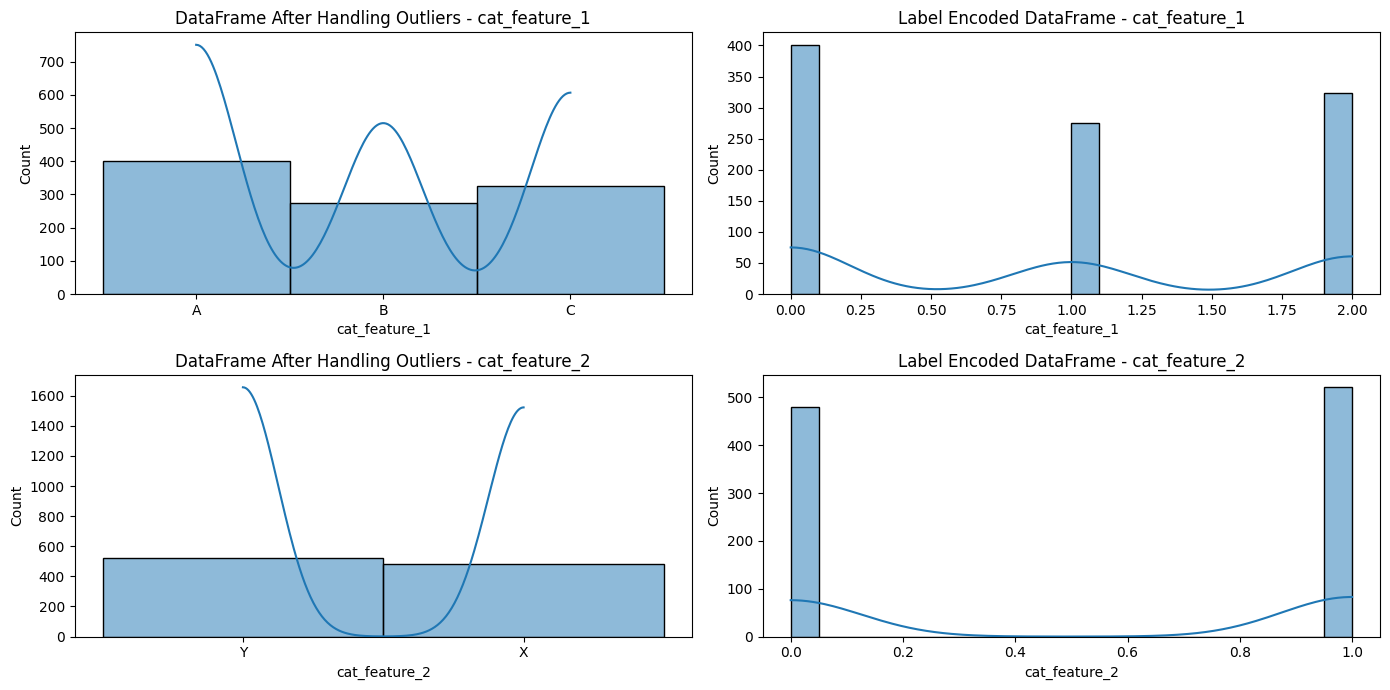

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df_before, df_after, features, title_before, title_after):
    common_features = [feature for feature in features if feature in df_before.columns and feature in df_after.columns]

    if not common_features:
        print("No common features found for plotting.")
        return

    plt.figure(figsize=(14, 7))

    for i, feature in enumerate(common_features):
        plt.subplot(len(common_features), 2, 2 * i + 1)
        sns.histplot(df_before[feature], kde=True, bins=20)
        plt.title(f"{title_before} - {feature}")

        plt.subplot(len(common_features), 2, 2 * i + 2)
        sns.histplot(df_after[feature], kde=True, bins=20)
        plt.title(f"{title_after} - {feature}")

    plt.tight_layout()
    plt.show()

# Histograms for categorical features before and after label encoding
cat_features_before_label = [feature for feature in cat_features if feature in df_outliers_handled.columns]
plot_histograms(
    df_outliers_handled,
    df_label_encoded,
    cat_features_before_label,
    title_before='DataFrame After Handling Outliers',
    title_after='Label Encoded DataFrame'
)





Columns in df_outliers_handled:
Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'cat_feature_1', 'cat_feature_2', 'num_feature_1_zscore',
       'num_feature_2_zscore', 'num_feature_3_zscore', 'num_feature_4_zscore'],
      dtype='object')
Columns in df_label_encoded:
Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'cat_feature_1', 'cat_feature_2', 'num_feature_1_zscore',
       'num_feature_2_zscore', 'num_feature_3_zscore', 'num_feature_4_zscore'],
      dtype='object')
Columns in df_before:
Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'cat_feature_1', 'cat_feature_2', 'num_feature_1_zscore',
       'num_feature_2_zscore', 'num_feature_3_zscore', 'num_feature_4_zscore'],
      dtype='object')
Columns in df_after:
Index(['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4',
       'cat_feature_1', 'cat_feature_2', 'num_feature_1_zscore',
       'num_feature_2_zscore',

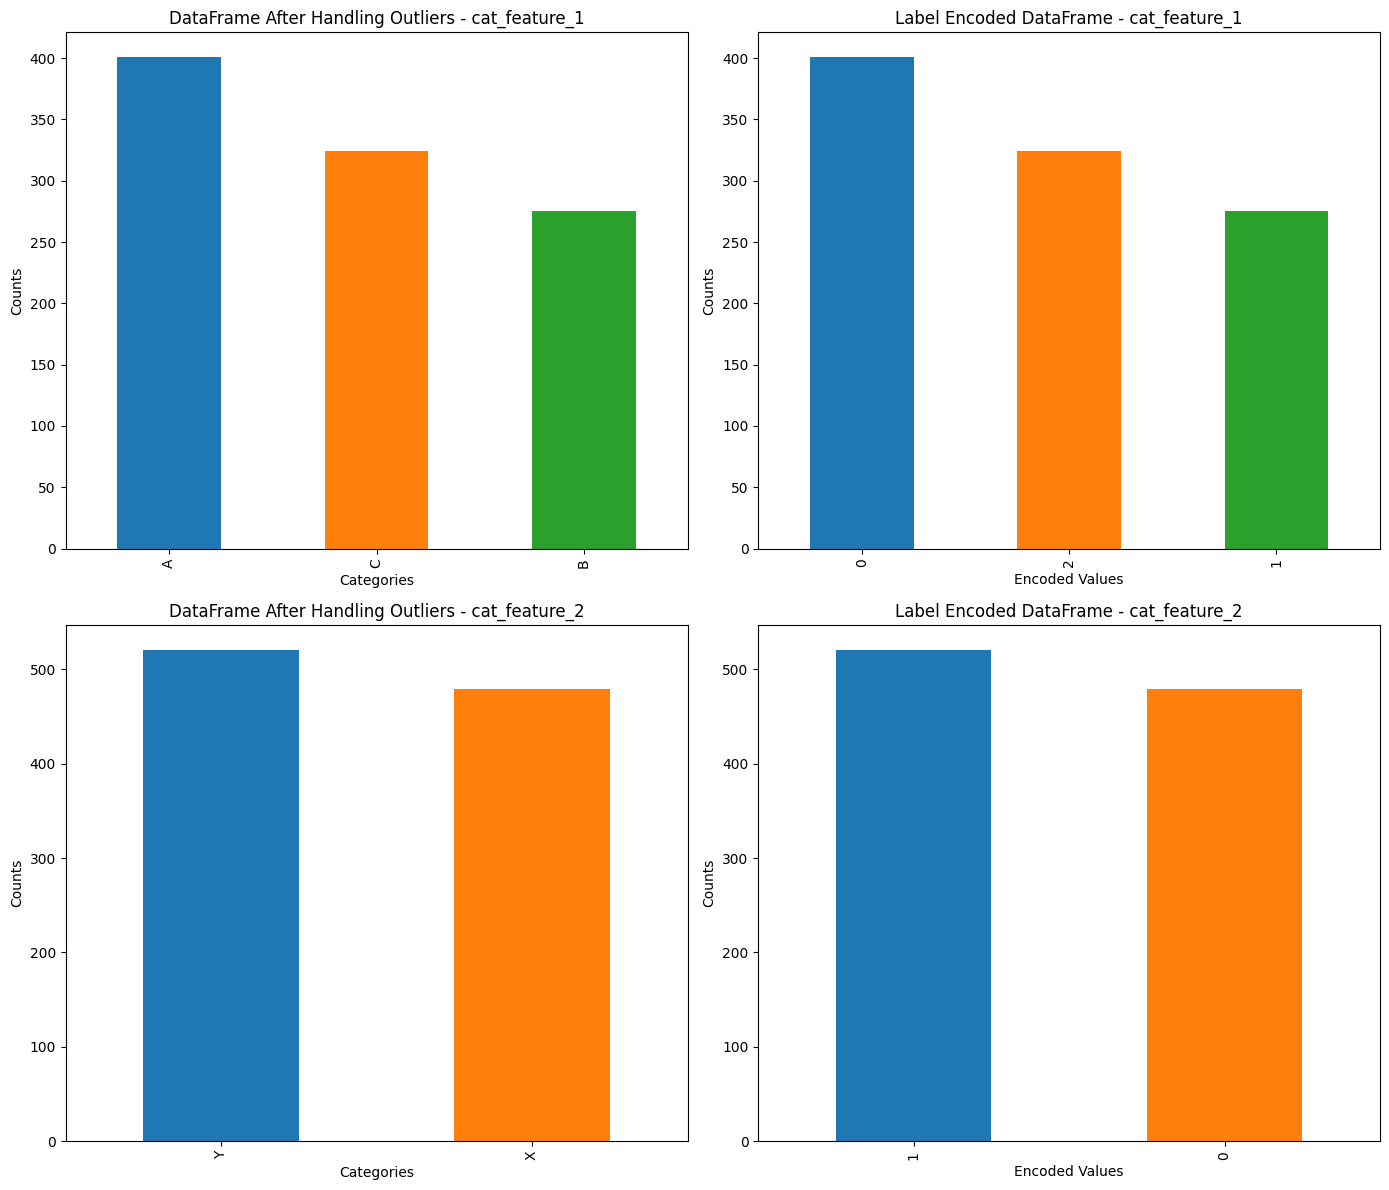

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def print_column_names(df, name):
    print(f"Columns in {name}:")
    print(df.columns)

def plot_label_encoding_comparison(df_before, df_after, cat_features, title_before, title_after):

    print_column_names(df_before, 'df_before')
    print_column_names(df_after, 'df_after')

    # Check if the specified categorical features are in both DataFrames
    common_cat_features = [feature for feature in cat_features if feature in df_before.columns and feature in df_after.columns]

    if not common_cat_features:
        print("No common categorical features found for plotting.")
        return

    num_features = len(common_cat_features)

    plt.figure(figsize=(14, num_features * 6))

    for i, feature in enumerate(common_cat_features):
        # Plot for before encoding
        plt.subplot(num_features, 2, 2 * i + 1)
        if feature in df_before.columns:
            df_before[feature].value_counts().plot(kind='bar', color=sns.color_palette("tab10", n_colors=len(df_before[feature].value_counts())))
            plt.title(f"{title_before} - {feature}")
            plt.xlabel('Categories')
            plt.ylabel('Counts')

        # Plot for after encoding
        plt.subplot(num_features, 2, 2 * i + 2)
        if feature in df_after.columns:
            df_after[feature].value_counts().plot(kind='bar', color=sns.color_palette("tab10", n_colors=len(df_after[feature].value_counts())))
            plt.title(f"{title_after} - {feature}")
            plt.xlabel('Encoded Values')
            plt.ylabel('Counts')

    plt.tight_layout()
    plt.show()

# Define categorical features to compare
cat_features = [col for col in df_outliers_handled.columns if col.startswith('cat_feature')]

# Print column names for debugging
print_column_names(df_outliers_handled, 'df_outliers_handled')
print_column_names(df_label_encoded, 'df_label_encoded')

# Plot label encoded features
plot_label_encoding_comparison(
    df_outliers_handled,
    df_label_encoded,
    cat_features,
    title_before='DataFrame After Handling Outliers',
    title_after='Label Encoded DataFrame'
)


## Feature Scaling:

**Min-Max Scaling:** Scale the numerical features to a range between 0 and 1.

**Standardization:** Scale the numerical features to have a mean of 0 and a standard deviation of 1.

### Tasks:

After handling categorical data, apply both scaling methods to the numerical features in your dataset.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


def apply_min_max_scaling(df, num_features):
    df_scaled = df.copy()
    min_max_scaler = MinMaxScaler()

    df_scaled[num_features] = min_max_scaler.fit_transform(df_scaled[num_features])

    return df_scaled

def apply_standardization(df, num_features):
    df_scaled = df.copy()
    standard_scaler = StandardScaler()

    df_scaled[num_features] = standard_scaler.fit_transform(df_scaled[num_features])

    return df_scaled

def combine_features(df_scaled, df_encoded_categorical):
    # Concatenate scaled numerical features with encoded categorical features
    df_combined = pd.concat([df_scaled.reset_index(drop=True), df_encoded_categorical.reset_index(drop=True)], axis=1)
    return df_combined

df_label_encoded = apply_label_encoding(df_outliers_handled, cat_features)

df_one_hot_encoded = apply_one_hot_encoding(df_outliers_handled, cat_features)

# Extract numerical features from One-Hot Encoded DataFrame
num_features = ['num_feature_1', 'num_feature_2', 'num_feature_3', 'num_feature_4']
df_numerical_features = df_one_hot_encoded[num_features]


df_min_max_scaled = apply_min_max_scaling(df_one_hot_encoded, num_features)


df_standardized = apply_standardization(df_one_hot_encoded, num_features)

# Extract encoded categorical features from One-Hot Encoded DataFrame
df_encoded_categorical = df_one_hot_encoded.drop(columns=num_features)

# Combine scaled numerical data with encoded categorical data
df_min_max_combined = combine_features(df_min_max_scaled, df_encoded_categorical)
df_standardized_combined = combine_features(df_standardized, df_encoded_categorical)


print("Min-Max Combined DataFrame (first 5 rows):")
print(df_min_max_combined.head())

print("\nStandardized Combined DataFrame (first 5 rows):")
print(df_standardized_combined.head())


df_min_max_combined.to_csv('df_min_max_combined.csv', index=False)
df_standardized_combined.to_csv('df_standardized_combined.csv', index=False)


Min-Max Combined DataFrame (first 5 rows):
   num_feature_1  num_feature_2  num_feature_3  num_feature_4  \
0       0.586037       0.767186       0.510252       0.162705   
1       0.467816       0.678413       0.064830       0.374439   
2       0.614145       0.516657       0.510252       0.735848   
3       0.777116       0.384529       0.109021       0.066636   
4       0.449963       0.636074       0.793913       0.392697   

   num_feature_1_zscore  num_feature_2_zscore  num_feature_3_zscore  \
0              0.514257              1.395530              0.076647   
1             -0.172279              0.892805             -1.514756   
2              0.677490             -0.023222              0.076647   
3              1.623907             -0.771468             -1.356868   
4             -0.275954              0.653040              1.090110   

   num_feature_4_zscore  cat_feature_1_B  cat_feature_1_C  cat_feature_2_Y  \
0             -0.674863              0.0              0.0    

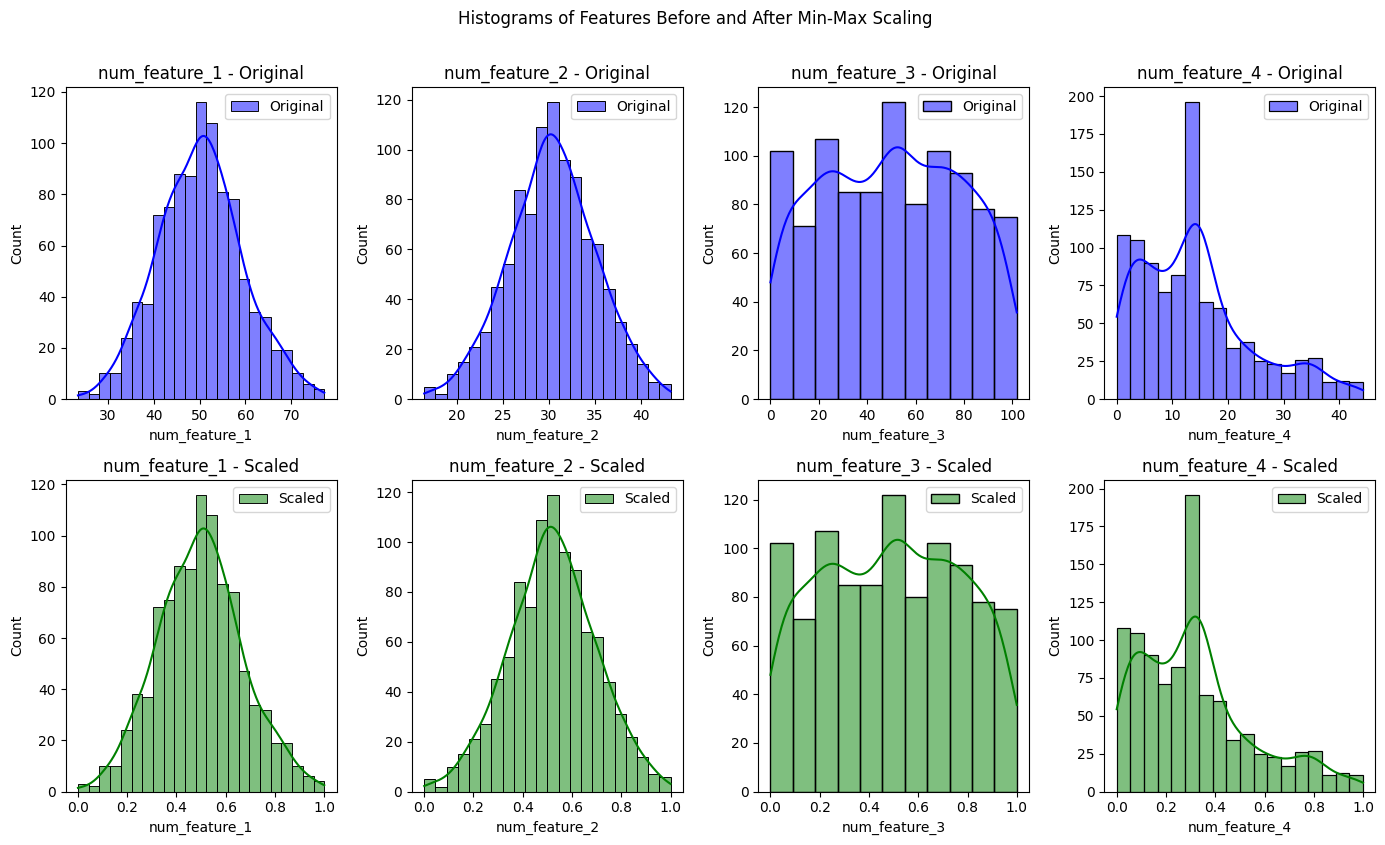

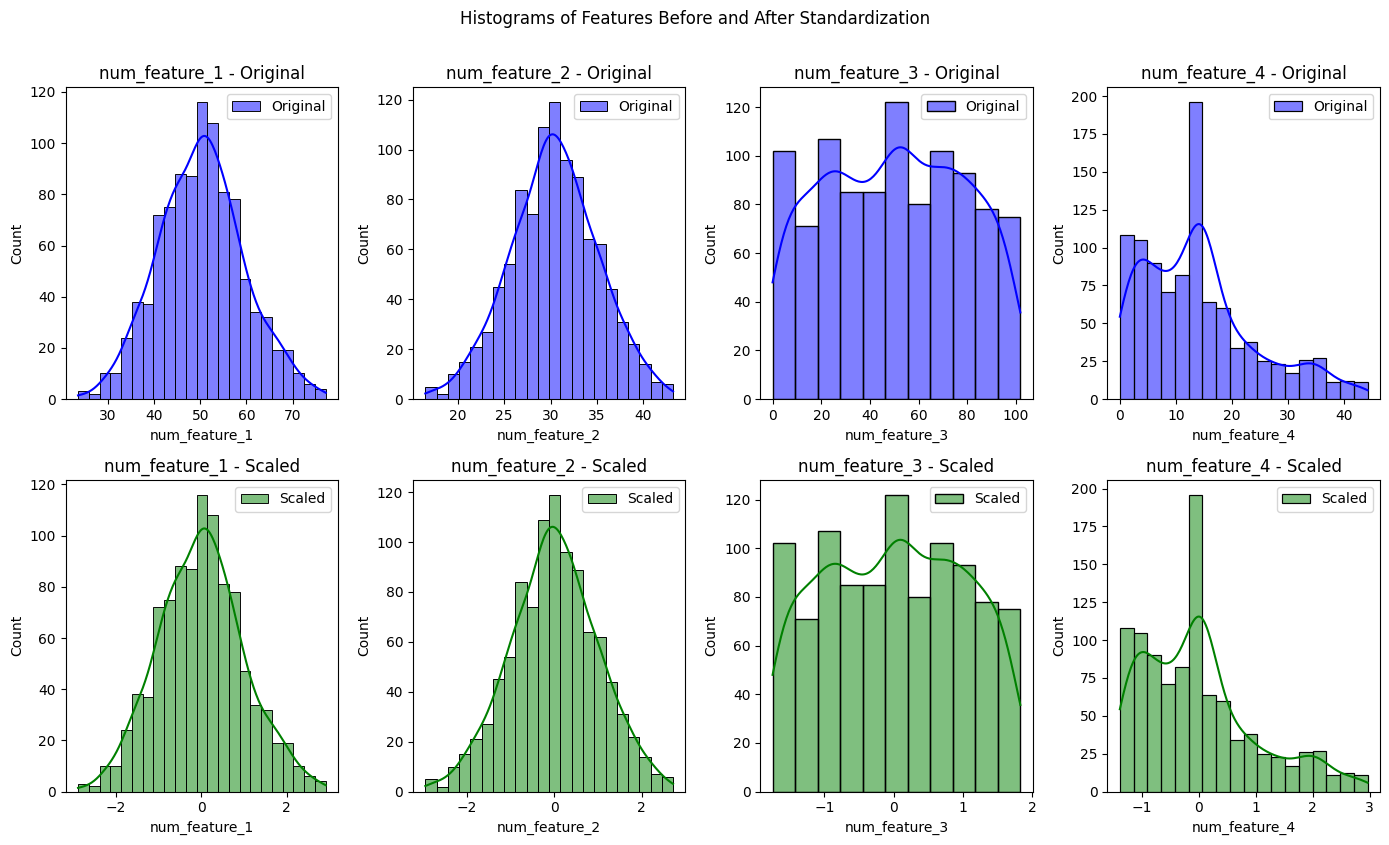

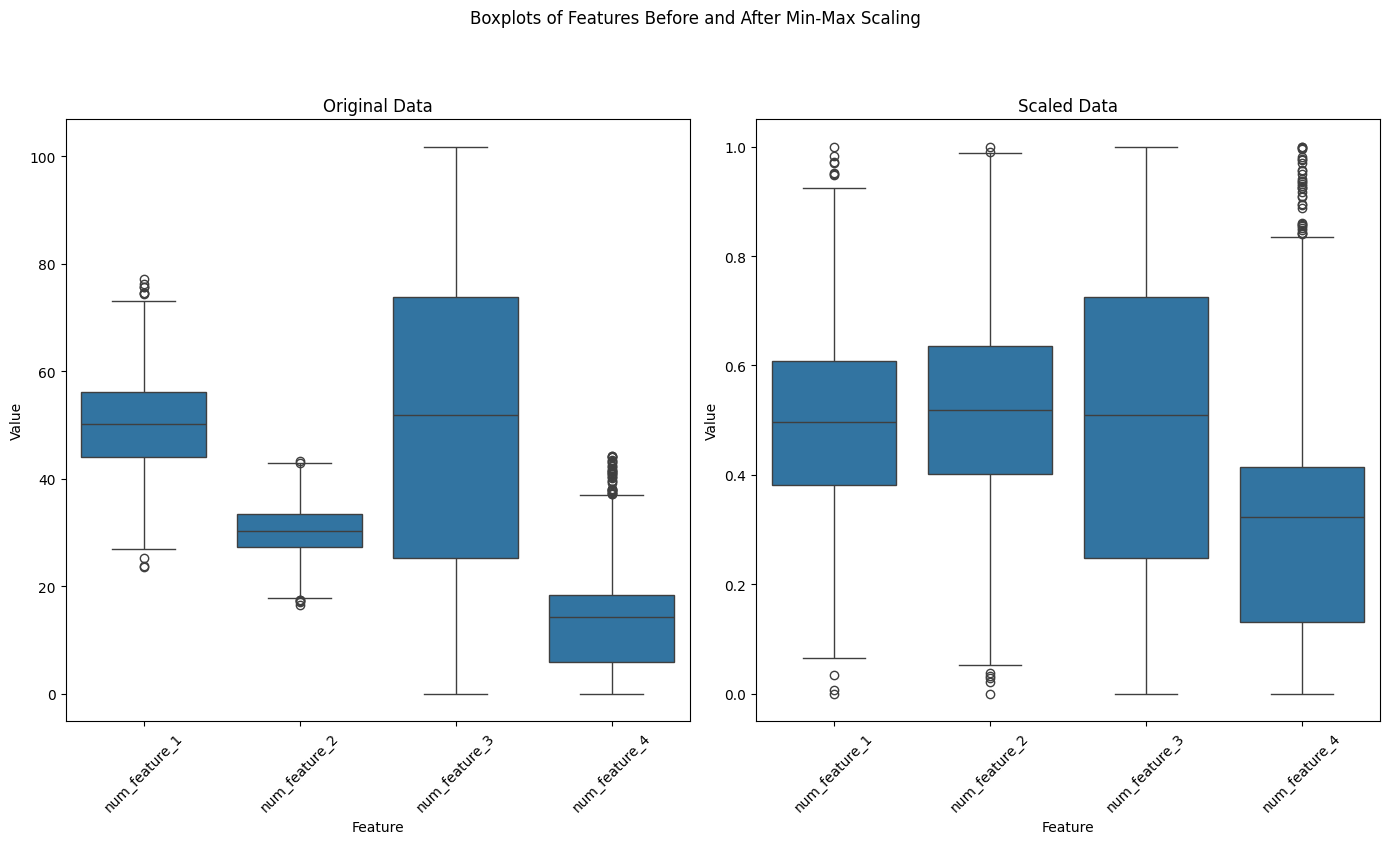

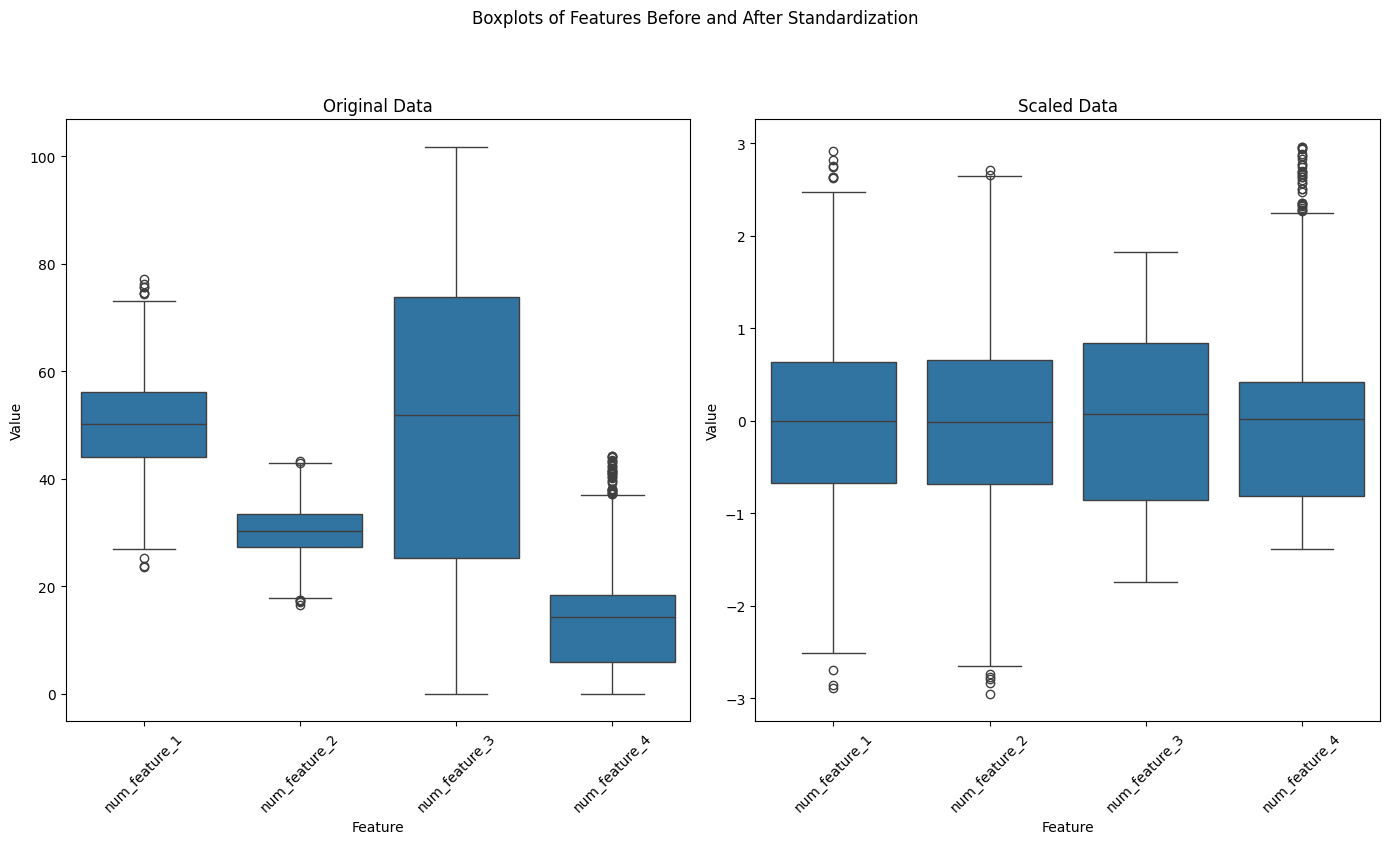

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df_original, df_scaled, num_features, title):
    plt.figure(figsize=(14, 8))

    for i, feature in enumerate(num_features):
        plt.subplot(2, len(num_features), i + 1)
        sns.histplot(df_original[feature], kde=True, color='blue', label='Original')
        plt.title(f'{feature} - Original')
        plt.legend()

        plt.subplot(2, len(num_features), len(num_features) + i + 1)
        sns.histplot(df_scaled[feature], kde=True, color='green', label='Scaled')
        plt.title(f'{feature} - Scaled')
        plt.legend()

    plt.tight_layout()
    plt.suptitle(title, y=1.05)
    plt.show()

def plot_boxplots(df_original, df_scaled, num_features, title):
    plt.figure(figsize=(14, 8))

    df_original_melted = df_original[num_features].melt(var_name='Feature', value_name='Value')
    df_scaled_melted = df_scaled[num_features].melt(var_name='Feature', value_name='Value')

    plt.subplot(1, 2, 1)
    sns.boxplot(x='Feature', y='Value', data=df_original_melted)
    plt.title('Original Data')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Feature', y='Value', data=df_scaled_melted)
    plt.title('Scaled Data')
    plt.xticks(rotation=45)

    plt.suptitle(title, y=1.05)
    plt.tight_layout()
    plt.show()


# Plot histograms for Min-Max Scaling
plot_histograms(df_one_hot_encoded[num_features], df_min_max_combined[num_features], num_features, 'Histograms of Features Before and After Min-Max Scaling')

# Plot histograms for Standardization
plot_histograms(df_one_hot_encoded[num_features], df_standardized_combined[num_features], num_features, 'Histograms of Features Before and After Standardization')

# Plot boxplots for Min-Max Scaling
plot_boxplots(df_one_hot_encoded, df_min_max_combined, num_features, 'Boxplots of Features Before and After Min-Max Scaling')

# Plot boxplots for Standardization
plot_boxplots(df_one_hot_encoded, df_standardized_combined, num_features, 'Boxplots of Features Before and After Standardization')


End of Assignment